In [1]:
import pandas as pd
# 배정된 그룹 정보 가지고 오기
group_assign_df = pd.read_excel('group_assign_df_관계스왑용.xlsx')
group_assign_df

,학년,임시반,임시번호,성별_명렬표,이름_명렬표,특이사항,merge_key,학교명,학년반번호,성별_검사결과,...,T점수 평균,지능지수,지능지수 P,상담 필요,_merge,결시생,동명이인,동명이인_ID,언어,초기그룹
0,1,1,1,1,강성미,특수(1학년6반 또는 1학년 7반 배정)\n10820 유진석(특수)과 다른반으로 배정,101011강성미,천보중학교,10101.0,1.0,...,48.0,97.0,42.5,1.0,both,0,0,NaN,52,6
1,1,1,2,1,김민주,NaN,101021김민주,천보중학교,10102.0,1.0,...,55.0,107.0,67.0,1.0,both,0,0,NaN,48,4
2,1,1,3,1,김민지,NaN,101031김민지,천보중학교,10103.0,1.0,...,48.0,97.0,42.5,0.0,both,0,1,2.0,62,4
3,1,1,4,1,김혜원,NaN,101041김혜원,천보중학교,10104.0,1.0,...,52.0,103.0,57.5,0.0,both,0,1,3.0,54,4
4,1,1,5,1,노지원,NaN,101051노지원,천보중학교,10105.0,1.0,...,69.0,128.0,96.0,0.0,both,0,0,NaN,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,4,25,1,이민우,병원진료로 진단검사 미응시,104251이민우,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,left_only,1,0,NaN,0,5
289,1,4,26,1,이성원,독감으로 진단검사 미응시\n10209 김사랑과 다른 반 배정,104261이성원,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,left_only,1,0,NaN,0,0
290,1,7,1,1,김가영,독감으로 진단검사 미응시,107011김가영,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,left_only,1,0,NaN,0,5
291,1,7,11,1,조하은,여행으로 진단검사 미응시,107111조하은,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,left_only,1,0,NaN,0,2


In [2]:
# 입력한 학생 관계 정보 가지고 오기
relationship_dict = {'101021김민주': {'101031김민지': -1, '108301김민지': -1}, '106181박지유': {'101031김민지': 1, '108301김민지': -1, '102121임지유': -1}, '106111정채미': {'107271정휘우': 1}, '110241이연호': {'107211박도현': 1}}
relationship_dict

{'101021김민주': {'101031김민지': -1, '108301김민지': -1},
 '106181박지유': {'101031김민지': 1, '108301김민지': -1, '102121임지유': -1},
 '106111정채미': {'107271정휘우': 1},
 '110241이연호': {'107211박도현': 1}}

In [3]:
# 관계 기반 그룹 배정 검토
for 주체 in relationship_dict:
    for 대상, 관계 in relationship_dict[주체].items():
        group_main = group_assign_df.loc[group_assign_df['merge_key'] == 주체, '초기그룹'].iloc[0]
        group_target = group_assign_df.loc[group_assign_df['merge_key'] == 대상, '초기그룹'].iloc[0]

        if 관계 == 1 and group_main != group_target:
            print(f"❌ {주체}와 {대상}: 같은 반이어야 하는데 다른 그룹임.")
        elif 관계 == -1 and group_main == group_target:
            print(f"❌ {주체}와 {대상}: 다른 반이어야 하는데 같은 그룹임.")

❌ 101021김민주와 101031김민지: 다른 반이어야 하는데 같은 그룹임.
❌ 101021김민주와 108301김민지: 다른 반이어야 하는데 같은 그룹임.
❌ 106181박지유와 101031김민지: 같은 반이어야 하는데 다른 그룹임.
❌ 106111정채미와 107271정휘우: 같은 반이어야 하는데 다른 그룹임.
❌ 110241이연호와 107211박도현: 같은 반이어야 하는데 다른 그룹임.


In [33]:
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq
from pprint import pprint

selected_discrete_variable = ['상담 필요']
ideal_freq = compute_ideal_discrete_freq(group_assign_df, ['상담 필요'])
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

group_freq = compute_group_discrete_freq(group_assign_df, ['상담 필요'])
print("현재 그룹별 성별 빈도 분포:")
pprint(group_freq)

group_total_cost = compute_group_total_cost(ideal_freq, group_freq, ['상담 필요'])
print("현재 그룹별 성별 총 비용:")
pprint(group_total_cost)

# 그룹별 크기 계산
group_sizes = group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}}}
현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 19, 1.0: 10}},
 1: {'상담 필요': {0.0: 18, 1.0: 11}},
 2: {'상담 필요': {0.0: 16, 1.0: 12}},
 3: {'상담 필요': {0.0: 20, 1.0: 8}},
 4: {'상담 필요': {0.0: 22, 1.0: 9}},
 5: {'상담 필요': {0.0: 20, 1.0: 8}},
 6: {'상담 필요': {0.0: 18, 1.0: 10}},
 7: {'상담 필요': {0.0: 22, 1.0: 7}},
 8: {'상담 필요': {0.0: 17, 1.0: 11}},
 9: {'상담 필요': {0.0: 16, 1.0: 12}}}
현재 그룹별 성별 총 비용:
{0: -0.3999999999999986,
 1: -0.3999999999999986,
 2: 0.6000000000000014,
 3: 0.6000000000000014,
 4: -2.3999999999999986,
 5: 0.6000000000000014,
 6: 0.6000000000000014,
 7: -0.3999999999999986,
 8: 0.6000000000000014,
 9: 0.6000000000000014}
그룹별 크기:
{0: 30, 1: 29, 2: 29, 3: 29, 4: 31, 5: 30, 6: 29, 7: 29, 8: 29, 9: 28}


In [ ]:
# 주체와 대상이 같은 반으로 배정되어야 하는 경우
# 대상이 어디로 가야할지 정해져 있음, 스왑되는 대상은 어디로 가야할지 정해져 있지 않음
'''
주체(subject) : 관계에서 주체가 되는 객체
대상(object) : 주체와 관계를 맺는 객체
스왑대상(target) : 관계를 적용하기 위해 스왑해야하는 대상
'''
# 대상 -> 주체 그룹, 스왑되는 대상 -> 그룹 탐색이 필요함
# 그면 총 두가지 과정이 필요함 크게
# 1. 대상이 주체 그룹으로 이동 -> 최적의 스왑 대상 탐색
# 2. 스왑 대상이 다른 그룹으로 이동 -> 최적의 이동 그룹 탐색
# 위 과정에서 매번 전체 관계정보를 확인해서 위배되는지 확인이 필요함 -> 이산형 비용계산에 관계 비용계산 추가 개발이 필요

from copy import deepcopy


for subject in relationship_dict: # relationship_dict : {주체: {대상: 관계}}
    for object, relationship in relationship_dict[subject].items():
        if relationship == 1: # 같은 반이어야 하는 경우
            subject_no = group_assign_df.loc[group_assign_df['merge_key'] == subject, '초기그룹'].iloc[0]
            object_no = group_assign_df.loc[group_assign_df['merge_key'] == object, '초기그룹'].iloc[0]

            if subject_no != object_no: # 다른 반인 경우
                print(f"🔄 {subject}와 {object}를 같은 반으로 배정 필요.")
                # 대상 row로 변환
                object_row = group_assign_df.loc[group_assign_df['merge_key'] == object]
                print("대상 학생 정보:")
                print(object_row)
                # 주체 df 필터링, 주체만 제외하고
                subject_df = group_assign_df.loc[group_assign_df['초기그룹'] == subject_no].drop(index=group_assign_df.index[group_assign_df['merge_key'] == subject])
                print("주체 그룹 학생 정보:")
                print(subject_df)
                # 스왑 대상 후보군 선정
                ## 대상의 이산형 특성 값
                object_discrete_values = object_row[selected_discrete_variable].iloc[0].to_dict()
                print("대상의 이산형 특성 값:")
                print(object_discrete_values)
                ## 주체 그룹에서 대상과 스왑했을 때 비용 개선이 가장 큰 학생 선정
                ## 우선 이산형 특성 기준으로 비용 계산
                min_cost = float('inf')
                swap_candidate = None
                for idx, candidate_target_row in subject_df.iterrows():
                    # 교환 시뮬레이션을 위해 복제
                    temp_df = deepcopy(group_assign_df)
                    # 스왑 수행
                    temp_df.loc[temp_df['merge_key'] == candidate_target_row['merge_key'], '초기그룹'] = object_row.values[0]
                    # 후보자의 이산형 특성 값
                    candidate_discrete_values = candidate_target_row[selected_discrete_variable].to_dict()
                    # 비용 계산
                    cost = 0
                    for var in selected_discrete_variable:
                        if object_discrete_values[var] != candidate_discrete_values[var]:
                            cost += 1  # 단순히 다르면 비용 1로 계산
                    print(f"후보자 {candidate_row['merge_key']}의 비용: {cost}")
                    if cost < min_cost:
                        min_cost = cost
                        swap_candidate = candidate_row
#! 이렇게 순서별로 이동 및 교환하는 경우 그룹 이동 조합에 따라 운이 안좋으면 모든 그룹이 이동 제한 그룹으로 설정될 수 있음
#! 따라서 전체 관계 정보를 고려한 비용 계산 로직이 필요함

🔄 106181박지유와 101031김민지를 같은 반으로 배정 필요.
대상 학생 정보:
   학년  임시반  임시번호  성별_명렬표 이름_명렬표 특이사항  merge_key    학교명    학년반번호  성별_검사결과  ...  \
2   1    1     3       1    김민지  NaN  101031김민지  천보중학교  10103.0      1.0  ...   

  T점수 평균  지능지수  지능지수 P  상담 필요  _merge 결시생  동명이인  동명이인_ID  언어  초기그룹  
2   48.0  97.0    42.5    0.0    both   0     1      2.0  62     4  

[1 rows x 41 columns]
주체 그룹 학생 정보:
     학년  임시반  임시번호  성별_명렬표 이름_명렬표  \
9     1    1    10       1    이경아   
35    1    2     8       1    원이빈   
46    1    2    19       1    김환희   
48    1    2    21       1    왕원호   
52    1    2    26       1    임승민   
55    1    2    29       1    조영광   
66    1    3     9       1    이가은   
70    1    3    13       1    최윤정   
74    1    3    17       1    고준서   
86    1    3    29       1    정환희   
105   1    4    20       1    도현수   
109   1    4    24       1    이민성   
111   1    4    29       1    천예준   
120   1    5     8       1    박세은   
123   1    5    11       1    송해린   
184   1    7    16     

# 전반적 관계 비용 설정

In [34]:
# 비용 산출을 위한 산출
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq
from pprint import pprint

selected_discrete_variable = ['상담 필요']
ideal_freq = compute_ideal_discrete_freq(group_assign_df, ['상담 필요'])
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

group_freq = compute_group_discrete_freq(group_assign_df, ['상담 필요'])
print("현재 그룹별 성별 빈도 분포:")
pprint(group_freq)

group_total_cost = compute_group_total_cost(ideal_freq, group_freq, ['상담 필요'])
print("현재 그룹별 성별 총 비용:")
pprint(group_total_cost)

# 그룹별 크기 계산
group_sizes = group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}}}
현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 19, 1.0: 10}},
 1: {'상담 필요': {0.0: 18, 1.0: 11}},
 2: {'상담 필요': {0.0: 16, 1.0: 12}},
 3: {'상담 필요': {0.0: 20, 1.0: 8}},
 4: {'상담 필요': {0.0: 22, 1.0: 9}},
 5: {'상담 필요': {0.0: 20, 1.0: 8}},
 6: {'상담 필요': {0.0: 18, 1.0: 10}},
 7: {'상담 필요': {0.0: 22, 1.0: 7}},
 8: {'상담 필요': {0.0: 17, 1.0: 11}},
 9: {'상담 필요': {0.0: 16, 1.0: 12}}}
현재 그룹별 성별 총 비용:
{0: -0.3999999999999986,
 1: -0.3999999999999986,
 2: 0.6000000000000014,
 3: 0.6000000000000014,
 4: -2.3999999999999986,
 5: 0.6000000000000014,
 6: 0.6000000000000014,
 7: -0.3999999999999986,
 8: 0.6000000000000014,
 9: 0.6000000000000014}
그룹별 크기:
{0: 30, 1: 29, 2: 29, 3: 29, 4: 31, 5: 30, 6: 29, 7: 29, 8: 29, 9: 28}


In [36]:
# 관계 위배 탐지
## 현재 배정된 그룹에서 관계가 위배되는 경우 탐지
relationship_violation_dict = {}
for subject in relationship_dict:
    for object, relationship in relationship_dict[subject].items():
        subject_group_no = group_assign_df.loc[group_assign_df['merge_key'] == subject, '초기그룹'].iloc[0]
        object_group_no = group_assign_df.loc[group_assign_df['merge_key'] == object, '초기그룹'].iloc[0]

        if relationship == 1 and subject_group_no != object_group_no:
            print(f"❌ {subject}와 {object}: 같은 반이어야 하는데 다른 그룹임.")
            relationship_violation_dict[(subject, object)] = relationship

        elif relationship == -1 and subject_group_no == object_group_no:
            print(f"❌ {subject}와 {object}: 다른 반이어야 하는데 같은 그룹임.")
            relationship_violation_dict[(subject, object)] = relationship
print("관계 위배 항목:")
pprint(relationship_violation_dict)

❌ 101021김민주와 101031김민지: 다른 반이어야 하는데 같은 그룹임.
❌ 101021김민주와 108301김민지: 다른 반이어야 하는데 같은 그룹임.
❌ 106181박지유와 101031김민지: 같은 반이어야 하는데 다른 그룹임.
❌ 106111정채미와 107271정휘우: 같은 반이어야 하는데 다른 그룹임.
❌ 110241이연호와 107211박도현: 같은 반이어야 하는데 다른 그룹임.
관계 위배 항목:
{('101021김민주', '101031김민지'): -1,
 ('101021김민주', '108301김민지'): -1,
 ('106111정채미', '107271정휘우'): 1,
 ('106181박지유', '101031김민지'): 1,
 ('110241이연호', '107211박도현'): 1}


In [ ]:
# 이동하면 관계 위배가 모두 해결될 그룹만 선정
for (subject, object), relationship in relationship_violation_dict.items():
    print(f"관계 위배 해결 필요: {subject}와 {object} ({'같은 반이어야 함' if relationship == 1 else '다른 반이어야 함'})")
    current_subject_group = group_assign_df.loc[group_assign_df['merge_key'] == subject, '초기그룹'].iloc[0]
    # 전체 그룹 후보 초기화
    candidate_groups = set(group_assign_df['초기그룹'].unique())
    # 관계정보 없는 경우 모든 그룹 허용? 이게 왜 있어야하지
    if subject not in relationship_dict and object not in relationship_dict:
        print("관계 정보 없음: 모든 그룹이 후보군에 포함됩니다.")
        return list(candidate_groups)

관계 위배 해결 필요: 101021김민주와 101031김민지 (다른 반이어야 함)
관계 위배 해결 필요: 101021김민주와 108301김민지 (다른 반이어야 함)
관계 위배 해결 필요: 106181박지유와 101031김민지 (같은 반이어야 함)
관계 위배 해결 필요: 106111정채미와 107271정휘우 (같은 반이어야 함)
관계 위배 해결 필요: 110241이연호와 107211박도현 (같은 반이어야 함)


In [39]:
'101021김민주' not in relationship_dict

False

In [40]:
'108301김민지' not in relationship_dict

True

In [41]:
def compute_relationship_violation_cost(df, relationship_dict):
    """
    모든 학생의 그룹 배정에 따른 관계 위반 비용을 계산한다.
    +1 관계가 다른 그룹이면 +1
    -1 관계가 같은 그룹이면 +1
    """
    cost = 0
    for subject, relations in relationship_dict.items():
        group_subject = df.loc[df['merge_key'] == subject, '초기그룹'].iloc[0]
        for object, rel in relations.items():
            group_object = df.loc[df['merge_key'] == object, '초기그룹'].iloc[0]

            if rel == 1 and group_subject != group_object:
                cost += 1  # 같은 반이어야 하는데 다름
            elif rel == -1 and group_subject == group_object:
                cost += 1  # 다른 반이어야 하는데 같음
    return cost
total_relationship_cost = compute_relationship_violation_cost(group_assign_df, relationship_dict)
print(f"전체 관계 위반 비용: {total_relationship_cost}")

전체 관계 위반 비용: 5


In [43]:
relationship_dict

{'101021김민주': {'101031김민지': -1, '108301김민지': -1},
 '106181박지유': {'101031김민지': 1, '108301김민지': -1, '102121임지유': -1},
 '106111정채미': {'107271정휘우': 1},
 '110241이연호': {'107211박도현': 1}}

# 관계 위배와 상관 없이 모든 관계에 대한 후보 그룹군 산출이 가능할까?

In [47]:
relationship_dict

{'101021김민주': {'101031김민지': -1, '108301김민지': -1},
 '106181박지유': {'101031김민지': 1, '108301김민지': -1, '102121임지유': -1},
 '106111정채미': {'107271정휘우': 1},
 '110241이연호': {'107211박도현': 1}}

In [45]:
from collections import defaultdict

def build_positive_groups(relationship_dict):
    # 같은반 관계만 모아서 union-find 형태로 묶기
    parent = {}

    def find(x):
        parent.setdefault(x, x)
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]

    def union(a, b):
        parent[find(a)] = find(b)

    # +1 관계 병합
    for a, relations in relationship_dict.items():
        for b, rel in relations.items():
            if rel == 1:
                union(a, b)

    # 결과 그룹화
    groups = defaultdict(list)
    for node in parent:
        groups[find(node)].append(node)
    return list(groups.values())
positive_groups = build_positive_groups(relationship_dict)
print("같은 반이어야 하는 그룹들:")
pprint(positive_groups)

같은 반이어야 하는 그룹들:
[['101031김민지', '106181박지유'],
 ['107271정휘우', '106111정채미'],
 ['107211박도현', '110241이연호']]


In [46]:
def build_conflict_edges(relationship_dict, positive_groups):
    conflict_edges = set()

    # 각 학생이 어떤 묶음(group component)에 속하는지 식별
    group_map = {student: i for i, members in enumerate(positive_groups) for student in members}

    for a, relations in relationship_dict.items():
        for b, rel in relations.items():
            if rel == -1:
                g1, g2 = group_map[a], group_map[b]
                if g1 != g2:
                    conflict_edges.add(tuple(sorted([g1, g2])))

    return list(conflict_edges)
conflict_edges = build_conflict_edges(relationship_dict, positive_groups)
print("다른 반이어야 하는 그룹 쌍들:")
pprint(conflict_edges)

KeyError: '101021김민주'

# 관계망으로 실시하기에는 너무 어려움

In [79]:
import pandas as pd
# 배정된 그룹 정보 가지고 오기
group_assign_df = pd.read_excel('group_assign_df_관계스왑용.xlsx')
group_assign_df

,학년,임시반,임시번호,성별_명렬표,이름_명렬표,특이사항,merge_key,학교명,학년반번호,성별_검사결과,...,T점수 평균,지능지수,지능지수 P,상담 필요,_merge,결시생,동명이인,동명이인_ID,종합점수,초기그룹
0,1,1,5,2,노지원,NaN,101052노지원,천보중학교,10105.0,2.0,...,69.0,128.0,96.0,0.0,both,0,0,NaN,214,0
1,1,1,7,2,성민주,NaN,101072성민주,천보중학교,10107.0,2.0,...,51.0,101.0,52.4,0.0,both,0,0,NaN,178,0
2,1,1,17,1,김동준,NaN,101171김동준,천보중학교,10117.0,1.0,...,59.0,113.0,79.1,0.0,both,0,0,NaN,188,0
3,1,3,20,1,박다옴,NaN,103201박다옴,천보중학교,10320.0,1.0,...,35.0,80.0,10.6,0.0,both,0,0,NaN,126,0
4,1,3,26,1,윤재원,NaN,103261윤재원,천보중학교,10326.0,1.0,...,45.0,92.0,30.8,1.0,both,0,0,NaN,141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,10,7,2,박소윤,NaN,110072박소윤,천보중학교,11007.0,2.0,...,59.0,113.0,79.1,0.0,both,0,0,NaN,185,9
289,1,10,21,1,박찬혁,NaN,110211박찬혁,천보중학교,11021.0,1.0,...,52.0,103.0,57.5,0.0,both,0,0,NaN,161,9
290,1,10,22,1,송민욱,NaN,110221송민욱,천보중학교,11022.0,1.0,...,52.0,103.0,57.5,1.0,both,0,0,NaN,153,9
291,1,10,23,1,이승준,NaN,110231이승준,천보중학교,11023.0,1.0,...,69.0,128.0,96.0,0.0,both,0,0,NaN,191,9


In [80]:
# 입력한 학생 관계 정보 가지고 오기
relationship_dict = {'101052노지원': {'101171김동준': -1, '102062박지우': 1, '109012구나경': 0, '103052박혜원': -1}, '103211박준수': {'103241배준한': 1}, '110122조수빈': {'103052박혜원': -1, '103241배준한': 1}, '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1}, '106201유연태': {'101052노지원': 1, '109012구나경': -1}}
relationship_dict

{'101052노지원': {'101171김동준': -1,
  '102062박지우': 1,
  '109012구나경': 0,
  '103052박혜원': -1},
 '103211박준수': {'103241배준한': 1},
 '110122조수빈': {'103052박혜원': -1, '103241배준한': 1},
 '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1},
 '106201유연태': {'101052노지원': 1, '109012구나경': -1}}

In [25]:
# 관계 기반 그룹 배정 검토
for 주체 in relationship_dict:
    for 대상, 관계 in relationship_dict[주체].items():
        group_main = group_assign_df.loc[group_assign_df['merge_key'] == 주체, '초기그룹'].iloc[0]
        group_target = group_assign_df.loc[group_assign_df['merge_key'] == 대상, '초기그룹'].iloc[0]

        if 관계 == 1 and group_main != group_target:
            print(f"❌ {주체}와 {대상}: 같은 반이어야 하는데 다른 그룹임.")
        elif 관계 == -1 and group_main == group_target:
            print(f"❌ {주체}와 {대상}: 다른 반이어야 하는데 같은 그룹임.")

❌ 101052노지원와 101171김동준: 다른 반이어야 하는데 같은 그룹임.
❌ 101052노지원와 102062박지우: 같은 반이어야 하는데 다른 그룹임.
❌ 110122조수빈와 103052박혜원: 다른 반이어야 하는데 같은 그룹임.
❌ 110122조수빈와 103241배준한: 같은 반이어야 하는데 다른 그룹임.
❌ 108072류다현와 104181김호태: 같은 반이어야 하는데 다른 그룹임.
❌ 108072류다현와 106142황한별: 같은 반이어야 하는데 다른 그룹임.
❌ 106201유연태와 101052노지원: 같은 반이어야 하는데 다른 그룹임.


In [26]:
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq
from pprint import pprint

selected_discrete_variable = ['성별_명렬표', '상담 필요']
ideal_freq = compute_ideal_discrete_freq(group_assign_df, selected_discrete_variable)
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

group_freq = compute_group_discrete_freq(group_assign_df, selected_discrete_variable)
print("현재 그룹별 성별 빈도 분포:")
pprint(group_freq)

group_total_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable)
print("현재 그룹별 성별 총 비용:")
pprint(group_total_cost)

# 그룹별 크기 계산
group_sizes = group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}, '성별_명렬표': {1: 14.7, 2: 14.6}}}
현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 21, 1.0: 8}, '성별_명렬표': {1: 15, 2: 15}},
 1: {'상담 필요': {0.0: 20, 1.0: 9}, '성별_명렬표': {1: 12, 2: 17}},
 2: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 18, 2: 11}},
 3: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 11, 2: 19}},
 4: {'상담 필요': {0.0: 20, 1.0: 9}, '성별_명렬표': {1: 15, 2: 15}},
 5: {'상담 필요': {0.0: 16, 1.0: 12}, '성별_명렬표': {1: 13, 2: 16}},
 6: {'상담 필요': {0.0: 15, 1.0: 13}, '성별_명렬표': {1: 17, 2: 12}},
 7: {'상담 필요': {0.0: 20, 1.0: 8}, '성별_명렬표': {1: 14, 2: 16}},
 8: {'상담 필요': {0.0: 18, 1.0: 10}, '성별_명렬표': {1: 16, 2: 12}},
 9: {'상담 필요': {0.0: 22, 1.0: 7}, '성별_명렬표': {1: 16, 2: 13}}}
현재 그룹별 성별 총 비용:
{0: -1.0999999999999996,
 1: -0.09999999999999964,
 2: -0.09999999999999964,
 3: -1.0999999999999996,
 4: -1.0999999999999996,
 5: 0.9000000000000004,
 6: 0.9000000000000004,
 7: -0.09999999999999964,
 8: 1.9000000000000004,
 9: -0.09999999999999964}
그룹별 크기:
{0: 30, 1

In [29]:
# group_assign_df의 분포
group_assign_df['종합점수'].groupby(group_assign_df['초기그룹']).describe()

,count,mean,std,min,25%,50%,75%,max
초기그룹,,,,,,,,
0,30.0,160.833333,39.940545,0.0,151.50,168.0,182.25,214.0
1,29.0,168.137931,24.136108,108.0,153.00,169.0,183.00,218.0
2,29.0,168.551724,24.115179,111.0,154.00,169.0,184.00,222.0
3,30.0,163.600000,39.209077,0.0,152.75,168.0,183.25,230.0
4,30.0,164.533333,40.212139,0.0,152.75,168.0,183.50,247.0
5,29.0,161.172414,38.266051,0.0,150.00,167.0,182.00,208.0
6,29.0,162.275862,37.869038,0.0,153.00,167.0,182.00,209.0
7,30.0,157.200000,47.626709,0.0,150.75,167.0,182.00,211.0
8,28.0,168.857143,21.460928,122.0,155.25,169.5,183.50,211.0


In [31]:
import pandas as pd

# 0을 제외한 평균과 표준편차 계산
stats = group_assign_df[group_assign_df['종합점수'] != 0].groupby('초기그룹')['종합점수'].agg(['mean', 'std'])

# 보기 좋게 정렬
stats = stats.rename(columns={'mean': '평균(0제외)', 'std': '표준편차(0제외)'})
print(stats)

         평균(0제외)  표준편차(0제외)
초기그룹                       
0     166.379310  26.391846
1     168.137931  24.136108
2     168.551724  24.115179
3     169.241379  24.564282
4     170.206897  25.973035
5     166.928571  22.848825
6     168.071429  21.841056
7     168.428571  21.796073
8     168.857143  21.460928
9     169.103448  20.951210


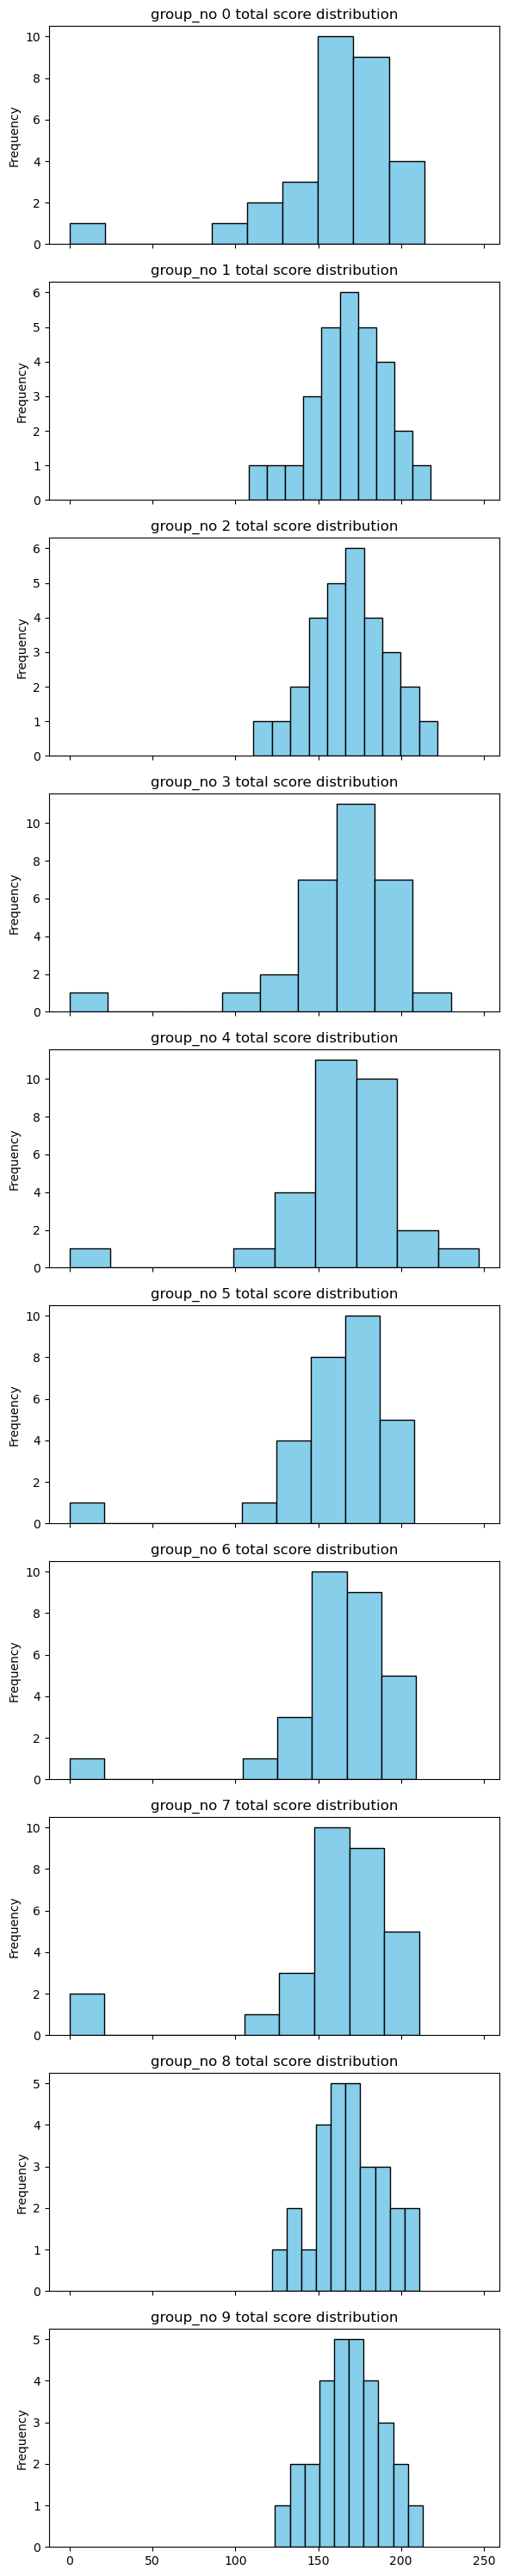

In [32]:
import matplotlib.pyplot as plt

groups = group_assign_df['초기그룹'].unique()
num_groups = len(groups)

fig, axes = plt.subplots(num_groups, 1, figsize=(6, 3*num_groups), sharex=True)  # 그룹별로 세로 배치
if num_groups == 1:
    axes = [axes]  # 그룹이 1개인 경우 예외 처리

for ax, group in zip(axes, groups):
    subset = group_assign_df[group_assign_df['초기그룹'] == group]['종합점수']
    ax.hist(subset, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f'group_no {group} total score distribution')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
# 관계 기반 그룹 배정 검토
for subject in relationship_dict:
    for object, relationship in relationship_dict[subject].items():
        group_main = group_assign_df.loc[group_assign_df['merge_key'] == subject, '초기그룹'].iloc[0]
        group_target = group_assign_df.loc[group_assign_df['merge_key'] == object, '초기그룹'].iloc[0]

        if relationship == 1 and group_main != group_target:
            print(f"❌ {subject}와 {object}: 같은 반이어야 하는데 다른 그룹임.")
        elif relationship == -1 and group_main == group_target:
            print(f"❌ {subject}와 {object}: 다른 반이어야 하는데 같은 그룹임.")

❌ 101052노지원와 101171김동준: 다른 반이어야 하는데 같은 그룹임.
❌ 101052노지원와 102062박지우: 같은 반이어야 하는데 다른 그룹임.
❌ 110122조수빈와 103052박혜원: 다른 반이어야 하는데 같은 그룹임.
❌ 110122조수빈와 103241배준한: 같은 반이어야 하는데 다른 그룹임.
❌ 108072류다현와 104181김호태: 같은 반이어야 하는데 다른 그룹임.
❌ 108072류다현와 106142황한별: 같은 반이어야 하는데 다른 그룹임.
❌ 106201유연태와 101052노지원: 같은 반이어야 하는데 다른 그룹임.


In [33]:
relationship_dict

{'101052노지원': {'101171김동준': -1,
  '102062박지우': 1,
  '109012구나경': 0,
  '103052박혜원': -1},
 '103211박준수': {'103241배준한': 1},
 '110122조수빈': {'103052박혜원': -1, '103241배준한': 1},
 '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1},
 '106201유연태': {'101052노지원': 1, '109012구나경': -1}}

In [38]:
# 관계 기반 그룹 후보군 검토
# 주체 그룹은 고정으로 순차적으로 필터링 하는 식으로 진행 해봄
from collections import defaultdict

group_candidates = set(group_assign_df['초기그룹'].unique())
object_group_no_candidates = defaultdict(lambda: group_candidates.copy())  # object : {가능한 그룹 번호}

for subject, relations in relationship_dict.items():
    subject_group_no = group_assign_df.loc[group_assign_df['merge_key'] == subject, '초기그룹'].iloc[0]
    print(f"주체: {subject} (그룹 {subject_group_no})")

    for object, relationship in relations.items():
        object_group_no = group_assign_df.loc[group_assign_df['merge_key'] == object, '초기그룹'].iloc[0]
        # 주체와 대상이 다른 반으로 배정되어야 하는 경우
        if relationship == -1:
            object_group_no_candidates[object].discard(subject_group_no)
            print(f"대상: {object} (그룹 {object_group_no}) - 가능한 그룹 번호에서 그룹 {subject_group_no} 제거")
        # 주체와 대상이 같은 반으로 배정되어야 하는 경우
        elif relationship == 1:
            object_group_no_candidates[object] &= {subject_group_no}
            print(f"대상: {object} (그룹 {object_group_no}) - 가능한 그룹 번호를 그룹 {subject_group_no}로 제한")
    print()
# 결과 출력
for object, candidates in object_group_no_candidates.items():
    print(f"{object}의 가능한 그룹 번호: {candidates}")

주체: 101052노지원 (그룹 0)
대상: 101171김동준 (그룹 0) - 가능한 그룹 번호에서 그룹 0 제거
대상: 102062박지우 (그룹 4) - 가능한 그룹 번호를 그룹 0로 제한
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 0 제거

주체: 103211박준수 (그룹 4)
대상: 103241배준한 (그룹 4) - 가능한 그룹 번호를 그룹 4로 제한

주체: 110122조수빈 (그룹 5)
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 5 제거
대상: 103241배준한 (그룹 4) - 가능한 그룹 번호를 그룹 5로 제한

주체: 108072류다현 (그룹 7)
대상: 104181김호태 (그룹 8) - 가능한 그룹 번호를 그룹 7로 제한
대상: 106142황한별 (그룹 8) - 가능한 그룹 번호를 그룹 7로 제한
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 7 제거

주체: 106201유연태 (그룹 8)
대상: 101052노지원 (그룹 0) - 가능한 그룹 번호를 그룹 8로 제한
대상: 109012구나경 (그룹 0) - 가능한 그룹 번호에서 그룹 8 제거

101171김동준의 가능한 그룹 번호: {1, 2, 3, 4, 5, 6, 7, 8, 9}
102062박지우의 가능한 그룹 번호: {0}
103052박혜원의 가능한 그룹 번호: {1, 2, 3, 4, 6, 8, 9}
103241배준한의 가능한 그룹 번호: set()
104181김호태의 가능한 그룹 번호: {7}
106142황한별의 가능한 그룹 번호: {7}
101052노지원의 가능한 그룹 번호: {8}
109012구나경의 가능한 그룹 번호: {0, 1, 2, 3, 4, 5, 6, 7, 9}


In [43]:
# 관계 기반 그룹 후보군 산출 함수
def compute_relationship_based_group_candidates(df, relationship_dict):
    from collections import defaultdict

    group_candidates = set(df['초기그룹'].unique())
    object_group_no_candidates = defaultdict(lambda: group_candidates.copy())  # object : {가능한 그룹 번호}

    for subject, relations in relationship_dict.items():
        subject_group_no = df.loc[df['merge_key'] == subject, '초기그룹'].iloc[0]
        print(f"주체: {subject} (그룹 {subject_group_no})")

        for object, relationship in relations.items():
            object_group_no = df.loc[df['merge_key'] == object, '초기그룹'].iloc[0]
            # 주체와 대상이 다른 반으로 배정되어야 하는 경우
            if relationship == -1:
                object_group_no_candidates[object].discard(subject_group_no)
                print(f"대상: {object} (그룹 {object_group_no}) - 가능한 그룹 번호에서 그룹 {subject_group_no} 제거")
            # 주체와 대상이 같은 반으로 배정되어야 하는 경우
            elif relationship == 1:
                object_group_no_candidates[object] &= {subject_group_no}
                print(f"대상: {object} (그룹 {object_group_no}) - 가능한 그룹 번호를 그룹 {subject_group_no}로 제한")
        print('---')
    
    # 만약 결과 중 가능한 그룹 번호가 없는 경우 경고 및 중단 처리
    for object, candidates in object_group_no_candidates.items():
        if not candidates:
            print(f"⚠️ 경고: {object}의 가능한 그룹 번호가 없습니다")
            raise ValueError(f"{object}의 가능한 그룹 번호가 없습니다")

    return dict(object_group_no_candidates)
relationship_based_candidates = compute_relationship_based_group_candidates(group_assign_df, relationship_dict)

주체: 101052노지원 (그룹 0)
대상: 101171김동준 (그룹 0) - 가능한 그룹 번호에서 그룹 0 제거
대상: 102062박지우 (그룹 4) - 가능한 그룹 번호를 그룹 0로 제한
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 0 제거
---
주체: 103211박준수 (그룹 4)
대상: 103241배준한 (그룹 4) - 가능한 그룹 번호를 그룹 4로 제한
---
주체: 110122조수빈 (그룹 5)
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 5 제거
대상: 103241배준한 (그룹 4) - 가능한 그룹 번호를 그룹 5로 제한
---
주체: 108072류다현 (그룹 7)
대상: 104181김호태 (그룹 8) - 가능한 그룹 번호를 그룹 7로 제한
대상: 106142황한별 (그룹 8) - 가능한 그룹 번호를 그룹 7로 제한
대상: 103052박혜원 (그룹 5) - 가능한 그룹 번호에서 그룹 7 제거
---
주체: 106201유연태 (그룹 8)
대상: 101052노지원 (그룹 0) - 가능한 그룹 번호를 그룹 8로 제한
대상: 109012구나경 (그룹 0) - 가능한 그룹 번호에서 그룹 8 제거
---
⚠️ 경고: 103241배준한의 가능한 그룹 번호가 없습니다


ValueError: 103241배준한의 가능한 그룹 번호가 없습니다

# 서로소 집합

In [138]:
def find_connected_groups_include_solo(relation_dict):
    from collections import defaultdict, deque

    # 1️⃣ 모든 학생 목록 추출 (key, value 모두 포함)
    all_students = set(relation_dict.keys())
    for relations in relation_dict.values():
        all_students.update(relations.keys())

    # 2️⃣ 양방향 그래프 생성 (관계 == 1 인 경우만)
    graph = defaultdict(set)
    for student, relations in relation_dict.items():
        for other, relation in relations.items():
            if relation == 1:
                graph[student].add(other)
                graph[other].add(student)

    # 3️⃣ 방문 관리 및 BFS 탐색
    visited = set()
    groups = []

    for student in all_students:
        if student not in visited:
            visited.add(student)
            group = set([student])
            queue = deque([student])

            while queue:
                current = queue.popleft()
                for neighbor in graph[current]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        group.add(neighbor)
                        queue.append(neighbor)

            groups.append(group)

    return groups

In [139]:
groups = find_connected_groups_include_solo(relationship_dict)
for i, g in enumerate(groups, 1):
    print(f"그룹 {i}: {g}")

그룹 1: {'102062박지우', '106201유연태', '101052노지원'}
그룹 2: {'103241배준한', '103211박준수', '110122조수빈'}
그룹 3: {'101171김동준'}
그룹 4: {'106142황한별', '104181김호태', '108072류다현'}
그룹 5: {'109012구나경'}
그룹 6: {'103052박혜원'}


In [83]:
relationship_dict

{'101052노지원': {'101171김동준': -1,
  '102062박지우': 1,
  '109012구나경': 0,
  '103052박혜원': -1},
 '103211박준수': {'103241배준한': 1},
 '110122조수빈': {'103052박혜원': -1, '103241배준한': 1},
 '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1},
 '106201유연태': {'101052노지원': 1, '109012구나경': -1}}

In [84]:
groups

[{'101052노지원', '102062박지우', '106201유연태'},
 {'103211박준수', '103241배준한', '110122조수빈'},
 {'101171김동준'},
 {'104181김호태', '106142황한별', '108072류다현'},
 {'109012구나경'},
 {'103052박혜원'}]

In [85]:
group_assign_df

,학년,임시반,임시번호,성별_명렬표,이름_명렬표,특이사항,merge_key,학교명,학년반번호,성별_검사결과,...,T점수 평균,지능지수,지능지수 P,상담 필요,_merge,결시생,동명이인,동명이인_ID,종합점수,초기그룹
0,1,1,5,2,노지원,NaN,101052노지원,천보중학교,10105.0,2.0,...,69.0,128.0,96.0,0.0,both,0,0,NaN,214,0
1,1,1,7,2,성민주,NaN,101072성민주,천보중학교,10107.0,2.0,...,51.0,101.0,52.4,0.0,both,0,0,NaN,178,0
2,1,1,17,1,김동준,NaN,101171김동준,천보중학교,10117.0,1.0,...,59.0,113.0,79.1,0.0,both,0,0,NaN,188,0
3,1,3,20,1,박다옴,NaN,103201박다옴,천보중학교,10320.0,1.0,...,35.0,80.0,10.6,0.0,both,0,0,NaN,126,0
4,1,3,26,1,윤재원,NaN,103261윤재원,천보중학교,10326.0,1.0,...,45.0,92.0,30.8,1.0,both,0,0,NaN,141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,1,10,7,2,박소윤,NaN,110072박소윤,천보중학교,11007.0,2.0,...,59.0,113.0,79.1,0.0,both,0,0,NaN,185,9
289,1,10,21,1,박찬혁,NaN,110211박찬혁,천보중학교,11021.0,1.0,...,52.0,103.0,57.5,0.0,both,0,0,NaN,161,9
290,1,10,22,1,송민욱,NaN,110221송민욱,천보중학교,11022.0,1.0,...,52.0,103.0,57.5,1.0,both,0,0,NaN,153,9
291,1,10,23,1,이승준,NaN,110231이승준,천보중학교,11023.0,1.0,...,69.0,128.0,96.0,0.0,both,0,0,NaN,191,9


In [88]:
from collections import Counter

for i, group in enumerate(groups, 1):
    subset = group_assign_df[group_assign_df['merge_key'].isin(group)]
    group_counts = Counter(subset['초기그룹'])
    print(f"관계그룹 {i}: {group}")
    print(f"현재 그룹 분포: {dict(group_counts)}")
    print("-" * 40)

관계그룹 1: {'102062박지우', '106201유연태', '101052노지원'}
현재 그룹 분포: {0: 1, 4: 1, 8: 1}
----------------------------------------
관계그룹 2: {'103241배준한', '103211박준수', '110122조수빈'}
현재 그룹 분포: {4: 2, 5: 1}
----------------------------------------
관계그룹 3: {'101171김동준'}
현재 그룹 분포: {0: 1}
----------------------------------------
관계그룹 4: {'106142황한별', '104181김호태', '108072류다현'}
현재 그룹 분포: {7: 1, 8: 2}
----------------------------------------
관계그룹 5: {'109012구나경'}
현재 그룹 분포: {0: 1}
----------------------------------------
관계그룹 6: {'103052박혜원'}
현재 그룹 분포: {5: 1}
----------------------------------------


In [100]:
groups

[{'101052노지원', '102062박지우', '106201유연태'},
 {'103211박준수', '103241배준한', '110122조수빈'},
 {'101171김동준'},
 {'104181김호태', '106142황한별', '108072류다현'},
 {'109012구나경'},
 {'103052박혜원'}]

In [101]:
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq
from pprint import pprint

selected_discrete_variable = ['성별_명렬표', '상담 필요']
ideal_freq = compute_ideal_discrete_freq(group_assign_df, selected_discrete_variable)
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

group_freq = compute_group_discrete_freq(group_assign_df, selected_discrete_variable)
print("현재 그룹별 성별 빈도 분포:")
pprint(group_freq)

group_total_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable)
print("현재 그룹별 성별 총 비용:")
pprint(group_total_cost)

# 그룹별 크기 계산
group_sizes = group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}, '성별_명렬표': {1: 14.7, 2: 14.6}}}
현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 21, 1.0: 8}, '성별_명렬표': {1: 15, 2: 15}},
 1: {'상담 필요': {0.0: 20, 1.0: 9}, '성별_명렬표': {1: 12, 2: 17}},
 2: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 18, 2: 11}},
 3: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 11, 2: 19}},
 4: {'상담 필요': {0.0: 20, 1.0: 9}, '성별_명렬표': {1: 15, 2: 15}},
 5: {'상담 필요': {0.0: 16, 1.0: 12}, '성별_명렬표': {1: 13, 2: 16}},
 6: {'상담 필요': {0.0: 15, 1.0: 13}, '성별_명렬표': {1: 17, 2: 12}},
 7: {'상담 필요': {0.0: 20, 1.0: 8}, '성별_명렬표': {1: 14, 2: 16}},
 8: {'상담 필요': {0.0: 18, 1.0: 10}, '성별_명렬표': {1: 16, 2: 12}},
 9: {'상담 필요': {0.0: 22, 1.0: 7}, '성별_명렬표': {1: 16, 2: 13}}}
현재 그룹별 성별 총 비용:
{0: -1.0999999999999996,
 1: -0.09999999999999964,
 2: -0.09999999999999964,
 3: -1.0999999999999996,
 4: -1.0999999999999996,
 5: 0.9000000000000004,
 6: 0.9000000000000004,
 7: -0.09999999999999964,
 8: 1.9000000000000004,
 9: -0.09999999999999964}
그룹별 크기:
{0: 30, 1

In [ ]:
import numpy as np
from collections import Counter

group_info = []
for i, group in enumerate(groups):
    subset = group_assign_df[group_assign_df['merge_key'].isin(group)]
    print(f"관계그룹 {i}: {group}")
    print(subset)
    counts = Counter(subset['초기그룹'])
    rep = max(counts, key=counts.get)  # 이동 전후로 편차의 개선을 최대로 하는 그룹을 선택하는 것으로 진행
    group_info.append({'관계그룹번호': i, '학생목록': group, '대표그룹': rep})
group_info

관계그룹 0: {'102062박지우', '106201유연태', '101052노지원'}
     학년  임시반  임시번호  성별_명렬표 이름_명렬표 특이사항  merge_key    학교명    학년반번호  성별_검사결과  \
0     1    1     5       2    노지원  NaN  101052노지원  천보중학교  10105.0      2.0   
126   1    2     6       2    박지우  NaN  102062박지우  천보중학교  10206.0      2.0   
249   1    6    20       1    유연태  NaN  106201유연태  천보중학교  10620.0      1.0   

     ...   지능지수  지능지수 P  상담 필요  _merge  결시생 동명이인  동명이인_ID  종합점수 초기그룹  최적그룹  
0    ...  128.0    96.0    0.0    both    0    0      NaN   214    0   1.0  
126  ...  111.0    75.5    0.0    both    0    0      NaN   166    4   1.0  
249  ...  107.0    67.0    0.0    both    0    0      NaN   170    8   1.0  

[3 rows x 42 columns]
관계그룹 1: {'103241배준한', '103211박준수', '110122조수빈'}
     학년  임시반  임시번호  성별_명렬표 이름_명렬표 특이사항  merge_key    학교명    학년반번호  성별_검사결과  \
130   1    3    21       1    박준수  NaN  103211박준수  천보중학교  10321.0      1.0   
131   1    3    24       1    배준한  NaN  103241배준한  천보중학교  10324.0      1.0   
175   1   10    12       2

[{'관계그룹번호': 0, '학생목록': {'101052노지원', '102062박지우', '106201유연태'}, '대표그룹': 0},
 {'관계그룹번호': 1, '학생목록': {'103211박준수', '103241배준한', '110122조수빈'}, '대표그룹': 4},
 {'관계그룹번호': 2, '학생목록': {'101171김동준'}, '대표그룹': 0},
 {'관계그룹번호': 3, '학생목록': {'104181김호태', '106142황한별', '108072류다현'}, '대표그룹': 8},
 {'관계그룹번호': 4, '학생목록': {'109012구나경'}, '대표그룹': 0},
 {'관계그룹번호': 5, '학생목록': {'103052박혜원'}, '대표그룹': 5}]

In [102]:
relationship_dict

{'101052노지원': {'101171김동준': -1,
  '102062박지우': 1,
  '109012구나경': 0,
  '103052박혜원': -1},
 '103211박준수': {'103241배준한': 1},
 '110122조수빈': {'103052박혜원': -1, '103241배준한': 1},
 '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1},
 '106201유연태': {'101052노지원': 1, '109012구나경': -1}}

In [93]:
must_diff = set()
for a, rels in relationship_dict.items():
    for b, r in rels.items():
        if r == -1:
            i = next(idx for idx, g in enumerate(groups) if a in g)
            j = next(idx for idx, g in enumerate(groups) if b in g)
            if i != j:
                must_diff.add(tuple(sorted((i, j))))
must_diff

{(0, 2), (0, 4), (0, 5), (1, 5), (3, 5)}

In [94]:
import itertools

def compute_cost(assign, group_info, must_diff, alpha=1.0):
    cost = 0
    for (i, j) in must_diff:
        if assign[i] == assign[j]:
            cost += 1000  # 큰 패널티 (제약 위반)

    for i, info in enumerate(group_info):
        cost += alpha * abs(assign[i] - info['대표그룹'])
    return cost

group_candidates = range(0, max(group_assign_df['초기그룹']) + 1)
best_assign, best_cost = None, float('inf')

for assign in itertools.product(group_candidates, repeat=len(groups)):
    c = compute_cost(assign, group_info, must_diff)
    if c < best_cost:
        best_cost, best_assign = c, assign

print("최적 그룹 배정:", best_assign)
print("비용:", best_cost)

최적 그룹 배정: (1, 4, 0, 8, 0, 5)
비용: 1.0


In [96]:
name_to_new_group = {}
for group_idx, names in enumerate(groups):
    new_group_num = best_assign[group_idx]
    for n in names:
        name_to_new_group[n] = new_group_num

group_assign_df['최적그룹'] = group_assign_df['merge_key'].map(name_to_new_group)

In [97]:
group_assign_df['최적그룹']

0      1.0
1      NaN
2      0.0
3      NaN
4      NaN
      ... 
288    NaN
289    NaN
290    NaN
291    NaN
292    NaN
Name: 최적그룹, Length: 293, dtype: float64

In [132]:
import numpy as np
import pandas as pd
from itertools import combinations
import random

def multi_to_one_group_swap_fast(
    df,
    swap_dict,             # {원래그룹번호: [인덱스리스트], ...}
    target_group,          # 중앙 그룹 번호
    selected_continuous_variable=None,
    selected_discrete_variable=None,
    w_cont=1.0,
    w_disc=1.0,
    max_candidates=None    # 중앙그룹 조합 제한
):
    """
    NumPy 기반 고속 다대일 그룹 교환 탐색 함수
    """

    # =========================
    # ① 기본 설정
    # =========================
    df = df.copy()
    group_col = "초기그룹"
    swap_groups = list(swap_dict.keys())
    total_swap_n = sum(len(v) for v in swap_dict.values())

    # 중앙그룹 후보 생성
    target_candidates = df[df[group_col] == target_group].index.to_numpy()
    all_combinations = list(combinations(target_candidates, total_swap_n))
    if max_candidates and len(all_combinations) > max_candidates:
        np.random.seed(42)
        all_combinations = random.sample(all_combinations, max_candidates)
    print(f"총 {len(all_combinations)}개의 중앙그룹 조합을 탐색합니다.")

    # =========================
    # ② baseline (교환 전)
    # =========================
    before_disc_cost, before_cont_cost = 0, 0

    # (1) 연속형 baseline
    if selected_continuous_variable is not None:
        pop_mean = float(df[selected_continuous_variable].mean())
        group_means = df.groupby(group_col)[selected_continuous_variable].mean().to_numpy()
        before_cont_cost = np.sum(np.abs(group_means - pop_mean))
    else:
        pop_mean = None

    # (2) 이산형 baseline
    if selected_discrete_variable:
        ideal_freq = compute_ideal_discrete_freq(df, selected_discrete_variable)
        group_freq_before = compute_group_discrete_freq(df, selected_discrete_variable)
        group_total_cost_before = compute_group_total_cost(
            ideal_freq, group_freq_before, selected_discrete_variable
        )
        before_disc_cost = sum(group_total_cost_before.values())

    before_total_cost = w_cont * before_cont_cost + w_disc * before_disc_cost

    # =========================
    # ③ 탐색 초기화
    # =========================
    best_combo = None
    best_improvement = 0.0
    best_after_cost = None

    # =========================
    # ④ 조합 탐색
    # =========================
    for combo in all_combinations:
        df_sim = df.copy()

        # (1) 여러 그룹 → 중앙그룹으로 이동
        for g, idx_list in swap_dict.items():
            df_sim.loc[idx_list, group_col] = target_group

        # (2) 중앙그룹 인원 total_swap_n명 → 원래 그룹으로 되돌림
        start = 0
        for g, idx_list in swap_dict.items():
            end = start + len(idx_list)
            df_sim.loc[list(combo)[start:end], group_col] = g
            start = end

        # -------------------------------
        # (3) 연속형 비용 계산
        # -------------------------------
        cont_cost_after = 0
        if selected_continuous_variable is not None:
            # numpy 기반으로 그룹 평균 벡터 계산
            vals = df_sim[[group_col, selected_continuous_variable]].to_numpy()
            unique_groups, group_mean_vals = np.unique(
                vals[:, 0], return_inverse=True
            )[0], []
            for g in np.unique(vals[:, 0]):
                group_mean_vals.append(
                    np.mean(vals[vals[:, 0] == g, 1].astype(float))
                )
            group_mean_vals = np.array(group_mean_vals)
            cont_cost_after = np.sum(np.abs(group_mean_vals - pop_mean))

        # -------------------------------
        # (4) 이산형 비용 계산
        # -------------------------------
        disc_cost_after = 0
        if selected_discrete_variable:
            ideal_freq_sim = compute_ideal_discrete_freq(df_sim, selected_discrete_variable)
            group_freq_after = compute_group_discrete_freq(df_sim, selected_discrete_variable)
            group_total_cost_after = compute_group_total_cost(
                ideal_freq_sim, group_freq_after, selected_discrete_variable
            )
            disc_cost_after = sum(group_total_cost_after.values())

        # -------------------------------
        # (5) 총비용 통합 및 개선도 계산
        # -------------------------------
        after_total_cost = w_cont * cont_cost_after + w_disc * disc_cost_after
        improvement = before_total_cost - after_total_cost

        if improvement > best_improvement:
            best_improvement = improvement
            best_combo = combo
            best_after_cost = after_total_cost
        print(f"조합 {combo} 탐색 완료: 개선도 {improvement:.4f}")

    # =========================
    # ⑤ 결과 반환
    # =========================
    result = {
        "best_combo": best_combo,
        "best_improvement": best_improvement,
        "before_cost": before_total_cost,
        "after_cost": best_after_cost,
    }
    return result

In [133]:
relation_dict = {}
for i, s in enumerate(groups):
    for name in s:
        relation_dict[name] = i + 1  # 관계그룹 번호
relation_dict

{'102062박지우': 1,
 '106201유연태': 1,
 '101052노지원': 1,
 '103241배준한': 2,
 '103211박준수': 2,
 '110122조수빈': 2,
 '101171김동준': 3,
 '106142황한별': 4,
 '104181김호태': 4,
 '108072류다현': 4,
 '109012구나경': 5,
 '103052박혜원': 6}

In [134]:
from copy import deepcopy
df = deepcopy(group_assign_df.copy())
df['관계그룹'] = df['merge_key'].map(relation_dict)

In [135]:
swap_dict = {
    1: df[df['관계그룹'] == 1].index.tolist(),  # 노지원, 박지우, 유연태
    4: df[df['관계그룹'] == 4].index.tolist()   # 김호태, 황한별, 류다현
}
pprint(swap_dict)
target_group = 9

{1: [0, 126, 249], 4: [225, 243, 248]}


In [136]:
result = multi_to_one_group_swap_fast(
    df,
    swap_dict,
    target_group,
    selected_continuous_variable='종합점수',
    selected_discrete_variable=['성별_명렬표', '상담 필요'],
    w_cont=1.0,
    w_disc=1.0,
    max_candidates=5000
)

총 5000개의 중앙그룹 조합을 탐색합니다.
조합 (269, 276, 279, 281, 287, 292) 탐색 완료: 개선도 -4.5497
조합 (267, 269, 278, 281, 289, 290) 탐색 완료: 개선도 -5.9704
조합 (264, 269, 273, 276, 283, 290) 탐색 완료: 개선도 -5.9995
조합 (280, 282, 283, 284, 290, 292) 탐색 완료: 개선도 -4.5885
조합 (264, 269, 270, 271, 275, 276) 탐색 완료: 개선도 -6.5836
조합 (268, 272, 273, 274, 279, 280) 탐색 완료: 개선도 -4.5561
조합 (264, 270, 271, 272, 276, 279) 탐색 완료: 개선도 -4.6143
조합 (266, 269, 270, 271, 276, 292) 탐색 완료: 개선도 -7.0976
조합 (271, 276, 281, 286, 287, 289) 탐색 완료: 개선도 -4.8309
조합 (266, 281, 283, 288, 290, 292) 탐색 완료: 개선도 -4.5723
조합 (267, 269, 270, 272, 277, 281) 탐색 완료: 개선도 -4.6967
조합 (264, 270, 274, 284, 285, 287) 탐색 완료: 개선도 -4.3072
조합 (267, 269, 272, 273, 281, 290) 탐색 완료: 개선도 -5.2043
조합 (269, 278, 280, 282, 285, 292) 탐색 완료: 개선도 -4.7145
조합 (268, 274, 280, 284, 286, 291) 탐색 완료: 개선도 -4.5464
조합 (267, 270, 277, 279, 286, 289) 탐색 완료: 개선도 -6.2818
조합 (268, 269, 276, 279, 284, 286) 탐색 완료: 개선도 -4.9359
조합 (268, 275, 276, 286, 291, 292) 탐색 완료: 개선도 -4.7242
조합 (270, 271, 279, 28

In [137]:
result

{'best_combo': None,
 'best_improvement': 0.0,
 'before_cost': 34.10197044334976,
 'after_cost': None}

# 관계 그룹 기반 최적화로

## 1단계 구현

In [154]:
import pandas as pd
# 배정된 그룹 정보 가지고 오기
group_assign_df = pd.read_excel('group_assign_df_관계스왑용.xlsx')
# 입력한 학생 관계 정보 가지고 오기
relationship_dict = {'101052노지원': {'101171김동준': -1, '102062박지우': 1, '109012구나경': 0, '103052박혜원': -1}, '103211박준수': {'103241배준한': 1}, '110122조수빈': {'103052박혜원': -1, '103241배준한': 1}, '108072류다현': {'104181김호태': 1, '106142황한별': 1, '103052박혜원': -1}, '106201유연태': {'101052노지원': 1, '109012구나경': -1}}

In [155]:
# 관계 그룹 탐색 함수
def find_connected_groups_include_solo(relation_dict):
    from collections import defaultdict, deque

    # 1️⃣ 모든 학생 목록 추출 (key, value 모두 포함)
    all_students = set(relation_dict.keys())
    for relations in relation_dict.values():
        all_students.update(relations.keys())

    # 2️⃣ 양방향 그래프 생성 (관계 == 1 인 경우만)
    graph = defaultdict(set)
    for student, relations in relation_dict.items():
        for other, relation in relations.items():
            if relation == 1:
                graph[student].add(other)
                graph[other].add(student)

    # 3️⃣ 방문 관리 및 BFS 탐색
    visited = set()
    groups = []

    for student in all_students:
        if student not in visited:
            visited.add(student)
            group = set([student])
            queue = deque([student])

            while queue:
                current = queue.popleft()
                for neighbor in graph[current]:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        group.add(neighbor)
                        queue.append(neighbor)

            groups.append(group)

    return groups

In [156]:
# 관계 그룹 탐색 테스트
groups = find_connected_groups_include_solo(relationship_dict)
for i, g in enumerate(groups, 1):
    print(f"그룹 {i}: {g}")

그룹 1: {'102062박지우', '106201유연태', '101052노지원'}
그룹 2: {'103241배준한', '103211박준수', '110122조수빈'}
그룹 3: {'101171김동준'}
그룹 4: {'106142황한별', '104181김호태', '108072류다현'}
그룹 5: {'109012구나경'}
그룹 6: {'103052박혜원'}


In [157]:
# 관계 그룹 딕셔너리 생성
relationship_group_dict = {}
for i, group in enumerate(groups):
    relationship_group_dict[f'relationship_group_{i + 1}'] = group
relationship_group_dict

{'relationship_group_1': {'101052노지원', '102062박지우', '106201유연태'},
 'relationship_group_2': {'103211박준수', '103241배준한', '110122조수빈'},
 'relationship_group_3': {'101171김동준'},
 'relationship_group_4': {'104181김호태', '106142황한별', '108072류다현'},
 'relationship_group_5': {'109012구나경'},
 'relationship_group_6': {'103052박혜원'}}

In [158]:
# 관계 그룹 딕셔너리 변환 (key : df)
relationship_group_df_dict = {}
for key, names in relationship_group_dict.items():
    relationship_group_df_dict[key] = group_assign_df[group_assign_df['merge_key'].isin(names)]
relationship_group_df_dict

{'relationship_group_1':      학년  임시반  임시번호  성별_명렬표 이름_명렬표 특이사항  merge_key    학교명    학년반번호  성별_검사결과  \
 0     1    1     5       2    노지원  NaN  101052노지원  천보중학교  10105.0      2.0   
 126   1    2     6       2    박지우  NaN  102062박지우  천보중학교  10206.0      2.0   
 249   1    6    20       1    유연태  NaN  106201유연태  천보중학교  10620.0      1.0   
 
      ... T점수 평균   지능지수  지능지수 P  상담 필요  _merge 결시생  동명이인  동명이인_ID 종합점수  초기그룹  
 0    ...   69.0  128.0    96.0    0.0    both   0     0      NaN  214     0  
 126  ...   57.0  111.0    75.5    0.0    both   0     0      NaN  166     4  
 249  ...   55.0  107.0    67.0    0.0    both   0     0      NaN  170     8  
 
 [3 rows x 41 columns],
 'relationship_group_2':      학년  임시반  임시번호  성별_명렬표 이름_명렬표 특이사항  merge_key    학교명    학년반번호  성별_검사결과  \
 130   1    3    21       1    박준수  NaN  103211박준수  천보중학교  10321.0      1.0   
 131   1    3    24       1    배준한  NaN  103241배준한  천보중학교  10324.0      1.0   
 175   1   10    12       2    조수빈  NaN  110122조수빈  천보중

In [161]:
# group_assign_df에서 관계 그룹 내에 있는 객체 제외
remaining_df = group_assign_df[~group_assign_df['merge_key'].isin(set().union(*relationship_group_dict.values()))]

In [ ]:
# 관계그룹 별로 각 그룹에 넣어봐서 비용 계산해보기
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq, compute_continuous_cost
from pprint import pprint

selected_discrete_variable = ['성별_명렬표', '상담 필요']
selected_sort_variable = '종합점수'
ideal_freq = compute_ideal_discrete_freq(group_assign_df, selected_discrete_variable)
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

# 병합 전 비용 계산
print("")
before_group_freq = compute_group_discrete_freq(remaining_df, selected_discrete_variable)
print("현재 그룹별 성별 빈도 분포:")
pprint(before_group_freq)
before_group_total_cost = compute_group_total_cost(ideal_freq, before_group_freq, selected_discrete_variable)
print("현재 그룹별 이산형 총 비용:")
pprint(before_group_total_cost)
before_group_sizes = remaining_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(before_group_sizes)
before_total_cost = sum([abs(value) for value in before_group_total_cost.values()])
print(f"병합 전 총 비용: {before_total_cost}")
#! 연속형 변수도 비용 계산을 할까...?

# 병합 후 비용 계산
for relation_group_no, relation_group_df in relationship_group_df_dict.items():
    for group_no in group_assign_df['초기그룹'].unique():
        temp_df = deepcopy(remaining_df) # 원본 복제
        relation_group_df['초기그룹'] = group_no # 관계그룹의 그룹을 시뮬레이션 대상의 그룹 번호로 변경
        temp_df = pd.concat([temp_df, relation_group_df], ignore_index=False) # 관계그룹 병합
        print(f"\n=== {relation_group_no}를 그룹 {group_no}에 배정한 경우 ===")


이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}, '성별_명렬표': {1: 14.7, 2: 14.6}}}

현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 18, 1.0: 8}, '성별_명렬표': {1: 14, 2: 13}},
 1: {'상담 필요': {0.0: 20, 1.0: 9}, '성별_명렬표': {1: 12, 2: 17}},
 2: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 18, 2: 11}},
 3: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 11, 2: 19}},
 4: {'상담 필요': {0.0: 18, 1.0: 8}, '성별_명렬표': {1: 13, 2: 14}},
 5: {'상담 필요': {0.0: 16, 1.0: 10}, '성별_명렬표': {1: 13, 2: 14}},
 6: {'상담 필요': {0.0: 15, 1.0: 13}, '성별_명렬표': {1: 17, 2: 12}},
 7: {'상담 필요': {0.0: 19, 1.0: 8}, '성별_명렬표': {1: 14, 2: 15}},
 8: {'상담 필요': {0.0: 16, 1.0: 9}, '성별_명렬표': {1: 14, 2: 11}},
 9: {'상담 필요': {0.0: 22, 1.0: 7}, '성별_명렬표': {1: 16, 2: 13}}}
현재 그룹별 이산형 총 비용:
{0: 4.9,
 1: -0.09999999999999964,
 2: -0.09999999999999964,
 3: -1.0999999999999996,
 4: 4.9,
 5: 4.9,
 6: 0.9000000000000004,
 7: 1.9000000000000004,
 8: 7.9,
 9: -0.09999999999999964}
그룹별 크기:
{0: 27, 1: 29, 2: 29, 3: 30, 4: 27, 5: 27, 6: 29, 7: 29, 8: 25, 9: 29}
병

In [164]:
group_sizes = group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

그룹별 크기:
{0: 30, 1: 29, 2: 29, 3: 30, 4: 30, 5: 29, 6: 29, 7: 30, 8: 28, 9: 29}


In [ ]:
{0: 27, 1: 29, 2: 29, 3: 30, 4: 27, 5: 27, 6: 29, 7: 29, 8: 25, 9: 29}

In [168]:
# 제대로 필터링 된건지 확인
for i, df in relationship_group_df_dict.items():
    print(df['초기그룹'].value_counts())

초기그룹
0    1
4    1
8    1
Name: count, dtype: int64
초기그룹
4    2
5    1
Name: count, dtype: int64
초기그룹
0    1
Name: count, dtype: int64
초기그룹
8    2
7    1
Name: count, dtype: int64
초기그룹
0    1
Name: count, dtype: int64
초기그룹
5    1
Name: count, dtype: int64


In [179]:
import numpy as np
import pandas as pd
from copy import deepcopy
from scipy.optimize import linear_sum_assignment
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq

def assign_relation_groups_optimal(group_assign_df, relationship_group_df_dict, selected_discrete_variable):
    """
    관계그룹을 전체 그룹에 최적으로 배정 (헝가리안 알고리즘 기반)
    """
    relation_group_keys = list(relationship_group_df_dict.keys())
    group_candidates = list(group_assign_df['초기그룹'].unique())
    
    R, G = len(relation_group_keys), len(group_candidates)
    print(f"관계그룹 수: {R}, 전체 그룹 수: {G}")

    # 이상적인 분포 계산
    ideal_freq = compute_ideal_discrete_freq(group_assign_df, selected_discrete_variable)

    # 비용 행렬 초기화
    cost_matrix = np.zeros((R, G))
    
    remaining_df = group_assign_df.copy()
    print("\n=== 비용 행렬 계산 중 ===")
    for i, rel_key in enumerate(relation_group_keys):
        rel_df = relationship_group_df_dict[rel_key]
        for j, g in enumerate(group_candidates):
            temp_df = deepcopy(remaining_df)
            rel_copy = rel_df.copy()
            rel_copy['초기그룹'] = g
            temp_df = pd.concat([temp_df, rel_copy], ignore_index=False)

            after_group_freq = compute_group_discrete_freq(temp_df, selected_discrete_variable)
            after_group_total_cost = compute_group_total_cost(ideal_freq, after_group_freq, selected_discrete_variable)
            total_cost = sum(abs(v) for v in after_group_total_cost.values())
            
            cost_matrix[i, j] = total_cost
        print(f"관계그룹 {rel_key} 완료.")

    print("\n비용 행렬:")
    print(pd.DataFrame(cost_matrix, index=relation_group_keys, columns=group_candidates))

    # 헝가리안 알고리즘 실행
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    best_combo = {relation_group_keys[i]: group_candidates[j] for i, j in zip(row_ind, col_ind)}
    best_total_cost = cost_matrix[row_ind, col_ind].sum()

    print("\n✅ 최적 배정 결과:")
    for rel, grp in best_combo.items():
        print(f" - 관계그룹 {rel} → 그룹 {grp}")

    print(f"\n🔻 최소 총 비용: {best_total_cost:.4f}")
    return best_combo, best_total_cost

best_assignment, best_cost = assign_relation_groups_optimal(
    remaining_df,
    relationship_group_df_dict,
    selected_discrete_variable
)

관계그룹 수: 6, 전체 그룹 수: 10

=== 비용 행렬 계산 중 ===
관계그룹 relationship_group_1 완료.
관계그룹 relationship_group_2 완료.
관계그룹 relationship_group_3 완료.
관계그룹 relationship_group_4 완료.
관계그룹 relationship_group_5 완료.
관계그룹 relationship_group_6 완료.

비용 행렬:
                         0     1     2     3     4     5     6     7     8  \
relationship_group_1  27.0  32.0  32.0  32.0  27.0  27.0  32.0  32.0  21.0   
relationship_group_2  27.0  32.0  32.0  32.0  27.0  27.0  32.0  32.0  21.0   
relationship_group_3  24.0  28.0  28.0  28.0  24.0  24.0  28.0  28.0  24.0   
relationship_group_4  27.0  32.0  32.0  32.0  27.0  27.0  32.0  32.0  21.0   
relationship_group_5  24.0  28.0  28.0  28.0  24.0  24.0  28.0  28.0  24.0   
relationship_group_6  24.0  28.0  28.0  28.0  24.0  24.0  28.0  28.0  24.0   

                         9  
relationship_group_1  32.0  
relationship_group_2  32.0  
relationship_group_3  28.0  
relationship_group_4  32.0  
relationship_group_5  28.0  
relationship_group_6  28.0  

✅ 최적 배정 결과:
 - 관계그

In [180]:
import pandas as pd
from copy import deepcopy

def merge_optimal_assignments(remaining_df, best_assignment, relationship_group_df_dict):
    """
    헝가리안 알고리즘 결과(best_assignment)를 반영하여
    관계그룹을 실제로 배정한 완전한 데이터프레임을 생성하는 함수.

    Parameters
    ----------
    remaining_df : pd.DataFrame
        관계그룹이 빠진 상태의 원본 그룹배정 데이터프레임.
    best_assignment : dict
        {관계그룹 이름 : 배정할 그룹번호} 형태의 딕셔너리.
        예: {'R1': 'g2', 'R2': 'g4'}
    relationship_group_df_dict : dict
        {관계그룹 이름 : 관계그룹 데이터프레임} 형태의 딕셔너리.

    Returns
    -------
    final_df : pd.DataFrame
        관계그룹 배정을 모두 반영한 최종 데이터프레임.
    """

    # 원본 복사
    final_df = deepcopy(remaining_df)

    # 각 관계그룹을 배정 결과에 따라 병합
    for rel_name, target_group in best_assignment.items():
        if rel_name not in relationship_group_df_dict:
            print(f"[경고] {rel_name}는 relationship_group_df_dict에 없음 — 건너뜀.")
            continue

        # 해당 관계그룹 DataFrame 복사
        rel_df = deepcopy(relationship_group_df_dict[rel_name])

        # 관계그룹의 그룹 번호를 최적 배정된 그룹으로 변경
        rel_df['초기그룹'] = target_group

        # 병합 (ignore_index=False → 기존 인덱스 유지)
        final_df = pd.concat([final_df, rel_df], ignore_index=False)

        print(f"✅ {rel_name} → {target_group} 배정 완료 (추가된 행: {len(rel_df)})")

    # 인덱스 정리 (원하면 True로 초기화 가능)
    final_df.reset_index(drop=True, inplace=True)

    print(f"\n🎯 최종 DataFrame 완성: 총 {len(final_df)}명")
    return final_df
final_group_assign_df = merge_optimal_assignments(
    remaining_df,
    best_assignment,
    relationship_group_df_dict
)

✅ relationship_group_1 → 8 배정 완료 (추가된 행: 3)
✅ relationship_group_2 → 4 배정 완료 (추가된 행: 3)
✅ relationship_group_3 → 0 배정 완료 (추가된 행: 1)
✅ relationship_group_4 → 5 배정 완료 (추가된 행: 3)
✅ relationship_group_5 → 3 배정 완료 (추가된 행: 1)
✅ relationship_group_6 → 1 배정 완료 (추가된 행: 1)

🎯 최종 DataFrame 완성: 총 293명


In [208]:
from cost_group_move import compute_group_discrete_freq, compute_group_total_cost, compute_ideal_discrete_freq
from pprint import pprint

selected_discrete_variable = ['성별_명렬표', '상담 필요']
ideal_freq = compute_ideal_discrete_freq(final_group_assign_df, selected_discrete_variable)
print("이상적인 성별 빈도 분포:")
pprint(ideal_freq)

group_freq = compute_group_discrete_freq(final_group_assign_df, selected_discrete_variable)
print("현재 그룹별 성별 빈도 분포:")
pprint(group_freq)

group_total_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable)
print("현재 그룹별 성별 총 비용:")
pprint(group_total_cost)

# 그룹별 크기 계산
group_sizes = final_group_assign_df['초기그룹'].value_counts().to_dict()
print("그룹별 크기:")
pprint(group_sizes)

이상적인 성별 빈도 분포:
{'population': {'상담 필요': {0.0: 18.8, 1.0: 9.8}, '성별_명렬표': {1: 14.7, 2: 14.6}}}
현재 그룹별 성별 빈도 분포:
{0: {'상담 필요': {0.0: 19, 1.0: 8}, '성별_명렬표': {1: 15, 2: 13}},
 1: {'상담 필요': {0.0: 20, 1.0: 10}, '성별_명렬표': {1: 12, 2: 18}},
 2: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 18, 2: 11}},
 3: {'상담 필요': {0.0: 19, 1.0: 11}, '성별_명렬표': {1: 11, 2: 20}},
 4: {'상담 필요': {0.0: 19, 1.0: 10}, '성별_명렬표': {1: 15, 2: 15}},
 5: {'상담 필요': {0.0: 18, 1.0: 11}, '성별_명렬표': {1: 14, 2: 16}},
 6: {'상담 필요': {0.0: 15, 1.0: 13}, '성별_명렬표': {1: 17, 2: 12}},
 7: {'상담 필요': {0.0: 19, 1.0: 8}, '성별_명렬표': {1: 14, 2: 15}},
 8: {'상담 필요': {0.0: 19, 1.0: 9}, '성별_명렬표': {1: 15, 2: 13}},
 9: {'상담 필요': {0.0: 22, 1.0: 7}, '성별_명렬표': {1: 16, 2: 13}}}
현재 그룹별 성별 총 비용:
{0: 2.9000000000000004,
 1: -2.0999999999999996,
 2: -0.09999999999999964,
 3: -3.0999999999999996,
 4: -1.0999999999999996,
 5: -1.0999999999999996,
 6: 0.9000000000000004,
 7: 1.9000000000000004,
 8: 1.9000000000000004,
 9: -0.09999999999999964}
그룹별 크기:
{0: 28, 1: 

### 함수 책갈피

In [214]:
def compute_ideal_discrete_freq(init_grouped_df, selected_discrete_variable):
    """
    이상적인(ideal) 이산형 변수별 그룹 빈도수를 계산하는 함수

    Parameters
    ----------
    df : pandas.DataFrame
        학생 정보가 포함된 데이터프레임 (각 행은 1명에 해당)
    discrete_vars : list
        이산형 변수(범주형 변수) 이름의 리스트
        예: ['성별_명렬표', '상담 필요']
    group_col : str
        그룹을 나타내는 컬럼명 (예: '초기그룹')
        → 그룹 개수를 계산하기 위함

    Returns
    -------
    ideal_freq : dict
        이상적인 빈도 구조를 담은 딕셔너리
        구조 예시:
        {
            'population': {
                '성별_명렬표': {1: 17.5, 2: 17.5},
                '상담 필요': {0: 30.0, 1: 5.0}
            }
        }

    Notes
    -----
    - 각 이산형 변수별 전체 빈도를 계산한 뒤,
      그룹 수로 나누어 "그룹별 이상적인 빈도"를 구함.
    - 예를 들어 전체 남학생이 35명이고 그룹이 2개면,
      각 그룹의 이상적인 남학생 수는 35 / 2 = 17.5명.
    """

    try:
        # ✅ 그룹 개수 확인 (전체 그룹이 몇 개인지)
        groups = init_grouped_df['초기그룹'].unique()
        group_n = len(groups)

        # ✅ 결과 저장용 딕셔너리 초기화
        ideal_freq = {'population': {}}

        # ✅ 각 이산형 변수별 이상적인 빈도 계산
        for var in selected_discrete_variable:
            # 전체 데이터에서 각 범주 값의 개수(count) 계산
            total_counts = init_grouped_df[var].value_counts()

            # 그룹 수로 나누어 "이상적인 그룹당 빈도"로 변환
            ideal_freq['population'][var] = (total_counts / group_n).to_dict()
    except Exception as e:
        print("Error during compute_ideal_discrete_freq execution:", str(e))
        raise e
    return ideal_freq

def compute_group_discrete_freq(init_grouped_df, selected_discrete_variable):
    """
    각 그룹별 실제 이산형(범주형) 변수의 빈도 분포를 계산하는 함수

    Parameters
    ----------
    df : pandas.DataFrame
        학생 정보가 포함된 데이터프레임
        (각 행은 한 명의 학생, group_col은 해당 학생이 속한 그룹)
    discrete_vars : list
        그룹 균형을 맞추기 위해 고려할 이산형 변수 이름 리스트
        예: ['성별_명렬표', '상담 필요']
    group_col : str
        그룹 구분 컬럼명 (예: '초기그룹')

    Returns
    -------
    group_freq : dict
        각 그룹의 실제 범주별 빈도 분포를 담은 딕셔너리

        예시 구조:
        {
            0: {  # 그룹 0
                '성별_명렬표': {1: 10, 2: 8},
                '상담 필요': {0: 15, 1: 3}
            },
            1: {  # 그룹 1
                '성별_명렬표': {1: 12, 2: 6},
                '상담 필요': {0: 14, 1: 4}
            }
        }

    Notes
    -----
    - 각 그룹별(subset)로 데이터프레임을 나눈 뒤,
      이산형 변수별로 value_counts()를 계산합니다.
    - 즉, “현재 그룹 구성에서 실제로 각 범주 값이 몇 명씩 있는가”를 확인합니다.
    """

    try:
        # ✅ 고유한 그룹 목록 추출
        groups = init_grouped_df['초기그룹'].unique()

        # ✅ 결과 저장용 딕셔너리 초기화
        group_freq = {}

        # ✅ 그룹별 이산형 변수 빈도 계산
        for g in groups:
            # 해당 그룹에 속한 데이터만 추출
            subset = init_grouped_df[init_grouped_df['초기그룹'] == g]

            # 그룹 g의 결과 저장용 하위 딕셔너리 초기화
            group_freq[g] = {}

            # 각 이산형 변수별 value_counts 계산
            for var in selected_discrete_variable:
                group_freq[g][var] = subset[var].value_counts().to_dict()
    except Exception as e:
        print("Error during compute_group_discrete_freq execution:", str(e))
        raise e
    return group_freq

def compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable):
    """
    각 그룹의 총 불균형도(total cost)를 계산하는 함수

    Parameters
    ----------
    ideal_freq : dict
        이상적인 빈도 정보 (compute_ideal_discrete_freq()의 결과)
        예시:
        {
            'population': {
                '성별_명렬표': {1: 17.5, 2: 17.5},
                '상담 필요': {0: 30.0, 1: 5.0}
            }
        }

    group_freq : dict
        실제 그룹별 범주 빈도 정보 (compute_group_discrete_freq()의 결과)
        예시:
        {
            0: {'성별_명렬표': {1: 10, 2: 8}, '상담 필요': {0: 15, 1: 3}},
            1: {'성별_명렬표': {1: 12, 2: 6}, '상담 필요': {0: 14, 1: 4}},
            ...
        }

    selected_discrete_variable : list
        계산에 포함할 이산형 변수명 리스트
        예: ['성별_명렬표', '상담 필요']

    Returns
    -------
    group_total_cost : dict
        각 그룹의 총 불균형도(total cost) 딕셔너리
        예시:
        {
            0: 9.0,
            1: 6.5,
            2: 8.2
        }

    Notes
    -----
    - 각 그룹에 대해 모든 이산형 변수의 각 범주별로
      ideal_count와 actual_count의 차이(|diff|)를 계산하고,
      이를 전부 합산하여 그룹의 total cost를 구함.
    - 즉, 그룹의 total cost가 클수록 이상적인 분포와의 차이가 큼.
    """

    group_total_cost = {}
    try:
        # ✅ 각 그룹별로 계산
        for g in group_freq.keys():
            total_cost = 0

            # 각 이산형 변수별로 편차 계산
            for var in selected_discrete_variable:
                for key, ideal_count in ideal_freq['population'][var].items():
                    # 해당 범주의 실제 빈도를 가져오되 없으면 0으로 처리
                    actual_count = group_freq[g][var].get(key, 0)
                    diff = ideal_count - actual_count # 이걸 절대값으로 계산해야하나? 뭔지 모르겠네

                    # 절댓값으로 편차 누적
                    total_cost += diff

            # 그룹별 총 불균형도 저장
            group_total_cost[g] = total_cost
    except Exception as e:
        print("Error during compute_group_total_cost execution:", str(e))
        raise e
    return group_total_cost

def compute_group_diff_and_sign(ideal_freq, group_freq, selected_discrete_variable):
    """
    각 그룹별 이산형 변수의 차이(diff)와 방향(sign)을 계산하는 함수

    Parameters
    ----------
    ideal_freq : dict
        이상적인 빈도 정보 (compute_ideal_discrete_freq()의 결과)
        예시:
        {
            'population': {
                '성별_명렬표': {1: 17.5, 2: 17.5},
                '상담 필요': {0: 30.0, 1: 5.0}
            }
        }

    group_freq : dict
        실제 그룹별 범주 빈도 정보 (compute_group_discrete_freq()의 결과)
        예시:
        {
            0: {'성별_명렬표': {1: 10, 2: 8}, '상담 필요': {0: 15, 1: 3}},
            1: {'성별_명렬표': {1: 12, 2: 6}, '상담 필요': {0: 14, 1: 4}}
        }

    discrete_vars : list
        계산 대상 이산형 변수명 리스트
        예: ['성별_명렬표', '상담 필요']

    Returns
    -------
    group_diff_cost : dict
        각 그룹의 변수별 diff와 sign을 담은 딕셔너리
        구조 예시:
        {
            0: {
                '성별_명렬표_diff': {1: 7.5, 2: 9.5},
                '성별_명렬표_sign': {1: +1.0, 2: +1.0},
                '상담 필요_diff': {0: 15.0, 1: 2.0},
                '상담 필요_sign': {0: +1.0, 1: +1.0}
            },
            1: { ... },
            ...
        }

    Notes
    -----
    - diff = ideal_count - actual_count
      → 양수(+)면 ideal보다 부족, 음수(–)면 ideal보다 과잉.
    - sign = np.sign(diff)
      → +1 = 증가 필요, –1 = 감소 필요, 0 = 이상적.
    - swap 후보 탐색 시,
      sign이 반대인 그룹끼리 교환 가능성 탐색에 활용함.
    """
    import numpy as np

    group_diff_cost = {}
    try:
        for g in group_freq.keys():
            group_diff_cost[g] = {}

            for var in selected_discrete_variable:
                # diff, sign 각각을 별도 dict로 저장
                diff_dict = {}
                sign_dict = {}

                # 각 범주(key)별로 ideal 대비 actual 차이 계산
                for key, ideal_count in ideal_freq['population'][var].items():
                    actual_count = group_freq[g][var].get(key, 0)
                    diff = ideal_count - actual_count
                    diff_dict[key] = diff
                    sign_dict[key] = np.sign(diff)

                # 변수별 결과를 group_diff_cost에 저장
                group_diff_cost[g][f'{var}_diff'] = diff_dict
                group_diff_cost[g][f'{var}_sign'] = sign_dict
    except Exception as e:
        print("Error during compute_group_diff_and_sign execution:", str(e))
        raise e
    return group_diff_cost

# 연속형 비용함수 설정
def compute_continuous_cost(init_grouped_df, s_row, t_row, selected_sort_variable): # selected_sort_variable : 단일 변수(1순위)
    import numpy as np
    try:
        pop_mean = float(init_grouped_df[selected_sort_variable].mean())

        source_group_df = init_grouped_df[init_grouped_df['초기그룹'] == s_row['초기그룹']]
        target_group_df = init_grouped_df[init_grouped_df['초기그룹'] == t_row['초기그룹']]

        before_dist = (
            np.abs(source_group_df[selected_sort_variable].mean() - pop_mean) +
            np.abs(target_group_df[selected_sort_variable].mean() - pop_mean)
        )

        # 시뮬레이션 이동
        simulated_df = init_grouped_df.copy()
        simulated_df.loc[s_row.name, '초기그룹'] = t_row['초기그룹']

        # 이동 후 그룹별 평균 계산
        group_mean_after = simulated_df.groupby('초기그룹')[selected_sort_variable].mean()

        # 이동 후 거리 계산
        after_dist = ( # 값이 작을수록 개선
            np.abs(group_mean_after.loc[t_row['초기그룹']] - pop_mean) +
            np.abs(group_mean_after.loc[s_row['초기그룹']] - pop_mean)
        )

        continuous_cost = before_dist - after_dist # 값이 클수록 개선
    except Exception as e:
        print("Error during compute_continuous_cost execution:", str(e))
        raise e
    return continuous_cost

def compute_discrete_cost(group_diff_cost, s_row, t_row, selected_discrete_variable):
    """
    이산형 불균형 비용 함수를 계산하는 함수 (학생 단위 이동 판단 개선 버전)

    Parameters
    ----------
    group_diff_cost : dict
        그룹별 이산형 변수별 diff(=ideal - current) 및 sign 정보를 담은 딕셔너리
    s_row : pandas.Series
        이동 대상 학생 (출발 그룹 정보 포함)
    t_row : pandas.Series
        이동 대상 학생 (도착 그룹 정보 포함)
    selected_discrete_variable : list
        고려할 이산형 변수 목록 (예: ['성별_명렬표', '상담 필요'])

    Returns
    -------
    discrete_cost_change : float
        이동으로 인한 비용 변화량 (값이 작을수록 개선)
        이동이 불가능한 경우 np.inf (무한대 비용) 반환
    """
    import copy
    import numpy as np
    try:
        # deepcopy로 원본 안전하게 복사
        new_group_diff = copy.deepcopy(group_diff_cost)

        source_group = s_row['초기그룹']
        target_group = t_row['초기그룹']

        # -------------------------------------------------
        # 학생 단위 이동 허용 여부 판단
        # -------------------------------------------------
        move_allowed = False  # 기본값: 이동 불가
        for var in selected_discrete_variable:
            source_cat = s_row[var]
            print(f"변수: {var}, 출발 그룹: {source_group}, 도착 그룹: {target_group}, 카테고리: {source_cat}")
            sign_val = group_diff_cost[source_group][f'{var}_sign'][source_cat]

            if sign_val > 0:  # 부족 상태면 즉시 이동 금지
                return -np.inf
            elif sign_val < 0:  # 과잉 상태 존재 시 이동 고려
                move_allowed = True

        # 모든 변수에서 균형(0)이거나 부족(+)이면 이동 금지
        if not move_allowed:
            return -np.inf

        # -------------------------------------------------
        # 이동 시나리오에 따른 비용 계산
        # -------------------------------------------------
        before_cost, after_cost = 0, 0

        for var in selected_discrete_variable:
            source_cat = s_row[var]

            # diff 값 갱신: source → target
            new_group_diff[source_group][f'{var}_diff'][source_cat] += 1
            new_group_diff[target_group][f'{var}_diff'][source_cat] -= 1

            # 그룹별 cost 계산 함수 정의
            def group_cost(g):
                return sum(abs(diff_val) for diff_val in new_group_diff[g][f'{var}_diff'].values())

            # 이동 후 비용
            after_cost += group_cost(source_group) + group_cost(target_group)

            # 이동 전 비용
            for g in [source_group, target_group]:
                before_cost += sum(abs(v) for v in group_diff_cost[g][f'{var}_diff'].values())

        # -------------------------------------------------
        # 최종 비용 변화량 계산
        # -------------------------------------------------
        discrete_cost_change = abs(after_cost - before_cost)
    except Exception as e:
        print("Error during compute_discrete_cost execution:", str(e))
        raise e
    return discrete_cost_change

def cost_group_move(max_iter, tolerance, w_discrete, w_continuous, init_grouped_df, selected_discrete_variable, selected_sort_variable_dict):
    print("cost_group_move 인자 확인메롱")
    print(f"max_iter: {max_iter}, tolerance: {tolerance}, w_discrete: {w_discrete}, w_continuous: {w_continuous}")
    print(f"selected_discrete_variable: {selected_discrete_variable}, selected_sort_variable: {selected_sort_variable_dict}")
    try:
        # 그룹이 하나만 있는 경우 바로 반환
        if init_grouped_df['초기그룹'].nunique() == 1:
            print("그룹이 하나만 있어 바로 반환합니다.")
            return init_grouped_df
        # -------------------------------------------------
        # 이산형 변수를 선택하지 않은 경우
        # -------------------------------------------------
        if not selected_discrete_variable :
            print("이산형 변수가 선택되지 않아 이산형 비용 함수 계산을 건너뜁니다.")
            selected_sort_variable = list(selected_sort_variable_dict.keys())[-1] # selected_sort_variable_dict : 딕셔너리 형태로 입력됨 (오른쪽으로 갈수록 우선순위 높음)

            # 초기 그룹 설정에서의 비용 계산(갱신용), 연속형 변수와 그룹 크기만 반영
            prev_group_mean = [init_grouped_df[init_grouped_df['초기그룹'] == g][selected_sort_variable].mean() for g in init_grouped_df['초기그룹'].unique()]
            prev_pop_mean = init_grouped_df[selected_sort_variable].mean()
            prev_diff_cost = sum([abs(gm - prev_pop_mean) for gm in prev_group_mean]) # 그룹 별 평균과 전체 평균의 차이의 절대값 합 -> 값이 클수록 불균형
            prev_mean_size = init_grouped_df.groupby('초기그룹').size().mean() # 이상적인 그룹 크기
            prev_size_cost = sum([abs(len(init_grouped_df[init_grouped_df['초기그룹'] == g]) - prev_mean_size) for g in init_grouped_df['초기그룹'].unique()]) # 그룹 크기 불균형도 -> 값이 클수록 불균형
            prev_total_cost = prev_diff_cost + 10 * prev_size_cost

            for iter_num in range(max_iter):
                print(f"\n======= Iteration {iter_num+1} =======")
                # 연속형 변수는 1순위 변수로만 비용함수 계산
                # 이동 전 연속형 변수 출력
                print("##############################")
                print("이동 전 그룹 연속형 변수 평균:")
                print(init_grouped_df.groupby('초기그룹')[selected_sort_variable].mean())
                group_sizes = init_grouped_df.groupby('초기그룹').size()
                print(group_sizes)
                group_mean_size = group_sizes.mean()
                # 이상적인 평균치 산출
                pop_mean = float(init_grouped_df[selected_sort_variable].mean())
                # 그룹별 총 불균형도 계산 <- 여기에 연속형뿐만 아니라 그룹 n크기도 반영해야됨.
                group_abs_mean_cost = {}
                groups = init_grouped_df['초기그룹'].unique()
                group_n_diff = {}
                group_tanh = {} # softsign 또는 tahn 함수를 활용해서 방향성과 그 정도를 반영하는 방법도 고려해야함.
                for g in groups:
                    group_df = init_grouped_df[init_grouped_df['초기그룹'] == g]
                    group_mean = group_df[selected_sort_variable].mean()
                    group_mean_diff = abs(group_mean - pop_mean) # 절대값
                    group_n_diff[g] = len(group_df) - group_mean_size # 그룹의 크기를 방향성 있도록 반영
                    group_abs_mean_cost[g] = group_mean_diff # 그룹의 평균은 절대값으로 반영
                    group_tanh[g] = np.tanh(group_mean_size - len(group_df)) # 이상적 그룹 빈도보다 크면 +, 작으면 -, 같으면 0
                # group_n_diff 높은 그룹 선택
                print(group_n_diff)
                source_group_idx = max(group_n_diff, key=group_n_diff.get) # 평균적인 그룹 크기보다 학생 수가 가장 많은 그룹 선택, 이상치와 같은 경우 0인 그룹도 선택됨
                print("이동할 그룹:", source_group_idx)
                # 이동할 그룹과 n수가 반대 방향을 가지는 그룹 중 편차 큰 그룹 선택
                target_tanh = -group_tanh[source_group_idx] # group_tanh 값이 0인 경우도 고려해야함.
                print("타깃 그룹의 tanh 방향:", target_tanh)
                match_group_tanh_idx = [g for g in group_tanh if np.sign(group_tanh[g]) == np.sign(target_tanh)] # 이동할 그룹과 반대 방향을 가지는 그룹들 <- 여기서 이동할 그룹은 제외됨
                print("타깃 그룹 후보:", match_group_tanh_idx)
                match_group_abs_cost_idx = {g: group_abs_mean_cost[g] for g in match_group_tanh_idx} # 반대 방향 그룹 중 평균 편차(절대값) 딕셔너리
                print("타깃 그룹 후보의 평균 편차:", match_group_abs_cost_idx)
                match_group_idx = sorted(match_group_abs_cost_idx, key=match_group_abs_cost_idx.get, reverse=True)[:3] # 반대 방향 그룹 중 평균 편차 큰 상위 3개 그룹 선택
                print("매칭 그룹:", set(match_group_idx))
                print("##############################")
                source_group_df = init_grouped_df[init_grouped_df['초기그룹']==source_group_idx]
                target_group_df = init_grouped_df[init_grouped_df['초기그룹'].isin(match_group_idx)] # match_group_idx : list 형태
                # 모든 쌍에 대해 비용 계산을 담은 딕셔너리
                pair_costs = {}
                for s_idx, s_row in source_group_df.iterrows():
                    for t_idx, t_row in target_group_df.iterrows():
                        # 여기서 s_row와 t_row를 비교하여 교환 가능성을 탐색
                        # 혹시 모르니 그룹이 같으면 생략 조건 설정 
                        if s_row['초기그룹'] == t_row['초기그룹']:
                            continue
                        #elif len(source_group_df) <= len(target_group_df): # 이동하는 그룹의 수보다 도착 그룹의 수가 더 많거나 같으면 비용계산 X -> 앞에서 적은 그룹은 많은 그룹 이동을 방지하도록 설정했으니 이 조건은 불필요
                        #    continue
                        elif len(source_group_df) == len(target_group_df):
                            print("출발 그룹과 도착 그룹의 학생 수가 동일하여 연속형 변수 비용만 계산")
                            cont_cost = compute_continuous_cost(init_grouped_df, s_row, t_row, selected_sort_variable) # 연속형 변수 비용 계산 (값이 클수록 개선)
                            size_penalty = 0
                        else:
                        # 연속형 변수 비용 계산
                            cont_cost = compute_continuous_cost(init_grouped_df, s_row, t_row, selected_sort_variable) # 연속형 변수 비용 계산 (값이 클수록 개선)
                            size_penalty = abs(group_sizes[s_row['초기그룹']] - group_mean_size) + abs(group_sizes[t_row['초기그룹']] - group_mean_size) # 그룹 크기 패널티 계산 (불균형, 값이 클수록 개선)
                        # 총 비용 계산
                        total_cost = w_continuous * cont_cost + 100 * size_penalty
                        print(f"쌍 ({s_idx}, {t_idx}) 연속형 비용: {cont_cost}, 크기 패널티: {size_penalty}, 총 비용: {total_cost}")
                        pair_costs[(s_idx, t_idx)] = total_cost
                # 최대 비용 쌍 선택
                best_pair = max(pair_costs, key=lambda x: pair_costs[x])
                best_cost = pair_costs[best_pair]
                print("최고 효율 쌍:", best_pair)
                print("비용:", best_cost) # 먼가 이상한데
                # 실제 그룹 이동
                idx_s, idx_t = best_pair
                # 그룹 실제 이동하는거 확인
                print("++이동하는 정보++")
                print(f"그룹 이동 완료: {init_grouped_df.loc[idx_s, '초기그룹']} -> {init_grouped_df.loc[idx_t, '초기그룹']}")
                print("이동 학생 정보:")
                print(init_grouped_df.loc[idx_s, selected_discrete_variable])
                print("+++++++++++++++")
                init_grouped_df.loc[idx_s, '초기그룹'] = init_grouped_df.loc[idx_t, '초기그룹']
                # 이동 후 비용 계산
                new_group_mean = init_grouped_df.groupby('초기그룹')[selected_sort_variable].mean()
                new_pop_mean = init_grouped_df[selected_sort_variable].mean()
                new_diff_cost = sum([abs(gm - new_pop_mean) for gm in new_group_mean]) # 그룹 별 평균과 전체 평균의 차이의 절대값 합
                new_size_cost = sum([abs(len(init_grouped_df[init_grouped_df['초기그룹'] == g]) - prev_mean_size) for g in init_grouped_df['초기그룹'].unique()]) # 그룹 크기 불균형도
                new_total_cost = new_diff_cost + 10 * new_size_cost
                print(f"이전 총 비용: {prev_total_cost}, 새로운 총 비용: {new_total_cost}")
                # 비용 개선폭 계산
                improvement = abs(prev_total_cost - new_total_cost)
                print(f"비용 개선폭: {improvement:.6f}")
                # 이동 후 그룹별 평균과 분포 출력 (확인용)
                group_freq = compute_group_discrete_freq(init_grouped_df, selected_discrete_variable)
                print("Group Frequency:")
                print(group_freq)
                # 개선폭 기준 만족 시 중단
                if improvement < tolerance:
                    print("개선 폭이 작아 중단합니다.")
                    break
                prev_total_cost = new_total_cost


        # -------------------------------------------------
        # 이산형, 연속형 변수를 모두 선택한 경우
        # -------------------------------------------------   
        else :
            print("이산형, 연속형 변수 모두 선택되어 비용 함수 계산을 진행합니다.")
            selected_sort_variable = list(selected_sort_variable_dict.keys())[-1] # selected_sort_variable_dict : 딕셔너리 형태로 입력됨 (오른쪽으로 갈수록 우선순위 높음)
            print(f"선택된 연속형 변수: {selected_sort_variable}")
            ideal_freq = compute_ideal_discrete_freq(init_grouped_df, selected_discrete_variable)
            print("이상적인 이산형 변수 빈도수:")
            print(ideal_freq)

            # 이전 총 비용 계산, 연속형, 이산형 모두 반영
            prev_group_mean = [init_grouped_df[init_grouped_df['초기그룹'] == g][selected_sort_variable].mean() for g in init_grouped_df['초기그룹'].unique()]
            print("이전 그룹별 연속형 변수 평균:")
            print(prev_group_mean)
            prev_pop_mean = init_grouped_df[selected_sort_variable].mean()
            print(f"전체 연속형 변수 평균: {prev_pop_mean}")
            prev_diff_cost = sum([abs(gm - prev_pop_mean) for gm in prev_group_mean]) # 그룹 별 평균과 전체 평균의 차이의 절대값 합 -> 값이 클수록 불균형
            print(f"이전 연속형 불균형도: {prev_diff_cost}")
            group_freq = compute_group_discrete_freq(init_grouped_df, selected_discrete_variable) # 각 그룹별 이산형 실제 빈도
            print("이전 그룹별 이산형 변수 빈도수:")
            print(group_freq)
            prev_disc_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable) # 각 그룹별 이산형 총 불균형도
            prev_disc_cost = {k: abs(v) for k, v in prev_disc_cost.items()} # 절대값 변환
            print("이전 그룹별 이산형 불균형도:")
            print(prev_disc_cost)
            prev_disc_total_cost = sum(prev_disc_cost.values())
            print(f"이전 이산형 총 불균형도: {prev_disc_total_cost}")
            print(f"이전 연속형 비용: {prev_diff_cost}, 이전 이산형 비용: {prev_disc_total_cost}")
            print(w_discrete)
            prev_total_cost = prev_diff_cost + 10 * prev_disc_total_cost
            print(f"이전 총 비용: {prev_total_cost}")

            for iter_num in range(max_iter):
                print(f"\n======= Iteration {iter_num+1} =======")
                # 그룹별 총 불균형도 및 diff, sign 계산
                group_freq = compute_group_discrete_freq(init_grouped_df, selected_discrete_variable) # 각 그룹별 이산형 실제 빈도
                group_total_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable) # 각 그룹별 이산형 총 불균형도
                group_diff_cost = compute_group_diff_and_sign(ideal_freq, group_freq, selected_discrete_variable) # 각 그룹별 이산형 diff, sign
                groups = init_grouped_df['초기그룹'].unique()

                # 이동 전 이상현 빈도 출력
                print("##############################")
                print("이전 그룹 빈도 분포:")
                print(group_freq)
                print("그룹별 총 불균형도:")
                print(group_total_cost)
                print("##############################")
                
                # 불균형이 가장 큰 그룹 탐색
                source_group_idx = min(group_total_cost, key=group_total_cost.get)
                print("##############################")
                print(f"최고 편차 그룹 : {source_group_idx}")
                print("이산변수 차이 및 부호 값:")
                print(group_diff_cost[source_group_idx])
                print("##############################")
                print("------- 후보 타깃 그룹 탐색 -------")
                for g in groups:
                    if g == source_group_idx:
                        continue
                    print(f"그룹 {g}의 이산변수 차이 및 부호 값:")
                    print(group_diff_cost[g])
                print("##############################")

                # 타깃 그룹 후보 제한 추가
                # source_group와 반대 방향을 지니고 있는 그룹들로 제한
                print("##############################")
                reversed_target = {}
                for var in selected_discrete_variable:
                    reversed_target[var] = {}
                    for key, value in group_diff_cost[source_group_idx][f'{var}_sign'].items():
                        reversed_target[var][key] = -value
                print(reversed_target)
                # 이거와 일치하는 방향의 그룹
                match_group_idx = []
                for g in groups:
                    all_match = True
                    for var in selected_discrete_variable:
                        for key, value in reversed_target[var].items():
                            if group_diff_cost[g][f'{var}_sign'].get(key, 0) != value:
                                all_match = False
                                break
                        if not all_match:
                            break
                    if all_match:
                        match_group_idx.append(g)
                        print(f"Matched group: {g}")
                        print("이산변수 차이 및 부호 값:")
                        print(group_diff_cost[g])
                if match_group_idx == []:
                    print("일치하는 매칭 그룹이 없습니다. 그룹 전체로 진행됩니다.")
                    # 모든 그룹을 대상으로 탐색할 경우 시간 비용이 너무 큼
                    # match_group_idx = [g for g in groups if g != source_group_idx]
                    match_group_idx = sorted(group_total_cost, key=group_total_cost.get, reverse=True)[:3]

                print("매칭 그룹:", set(match_group_idx))
                print("##############################")
                source_group_df = init_grouped_df[init_grouped_df['초기그룹']==source_group_idx]
                target_group_df = init_grouped_df[init_grouped_df['초기그룹'].isin(match_group_idx)] # match_group_idx : list 형태

                # 연속형 변수는 1순위 변수로만 비용함수 계산
                selected_sort_variable = list(selected_sort_variable_dict.keys())[-1] # selected_sort_variable_dict : 딕셔너리 형태로 입력됨 (오른쪽으로 갈수록 우선순위 높음)
                # 모든 쌍에 대해 비용 계산을 담은 딕셔너리
                pair_costs = {}
                for s_idx, s_row in source_group_df.iterrows():
                    for t_idx, t_row in target_group_df.iterrows():
                        # 여기서 s_row와 t_row를 비교하여 교환 가능성을 탐색
                        # 혹시 모르니 조건 설정
                        if s_row['초기그룹'] == t_row['초기그룹']:
                            continue
                        # 이산형 변수 비용 계산
                        disc_cost = compute_discrete_cost(group_diff_cost, s_row, t_row, selected_discrete_variable)
                        # 연속형 변수 비용 계산
                        cont_cost = compute_continuous_cost(init_grouped_df, s_row, t_row, selected_sort_variable)
                        # 총 비용 계산
                        total_cost = w_discrete * disc_cost + w_continuous * cont_cost

                        pair_costs[(s_idx, t_idx)] = total_cost
                # 최대 비용 쌍 선택
                best_pair = max(pair_costs, key=lambda x: pair_costs[x])
                best_cost = pair_costs[best_pair]
                print("최고 효율 쌍:", best_pair)
                print("비용:", best_cost)
                # 실제 그룹 이동
                idx_s, idx_t = best_pair
                # 그룹 실제 이동하는거 확인
                print("++이동하는 정보++")
                print(f"그룹 이동 완료: {init_grouped_df.loc[idx_s, '초기그룹']} -> {init_grouped_df.loc[idx_t, '초기그룹']}")
                print("이동 학생 정보:")
                print(init_grouped_df.loc[idx_s, selected_discrete_variable])
                print("+++++++++++++++")
                init_grouped_df.loc[idx_s, '초기그룹'] = init_grouped_df.loc[idx_t, '초기그룹']
                # 이동 후 비용 계산
                new_group_mean = init_grouped_df.groupby('초기그룹')[selected_sort_variable].mean()
                new_pop_mean = init_grouped_df[selected_sort_variable].mean()
                new_diff_cost = sum([abs(gm - new_pop_mean) for gm in new_group_mean]) # 그룹 별 평균과 전체 평균의 차이의 절대값 합
                group_freq = compute_group_discrete_freq(init_grouped_df, selected_discrete_variable)
                new_disc_cost = compute_group_total_cost(ideal_freq, group_freq, selected_discrete_variable) # 각 그룹별 이산형 총 불균형도
                new_disc_cost = {k: abs(v) for k, v in new_disc_cost.items()} # 절대값 변환
                new_disc_total_cost = sum(new_disc_cost.values())
                new_total_cost = new_diff_cost + 10 * new_disc_total_cost
                print(f"이전 총 비용: {prev_total_cost}, 새로운 총 비용: {new_total_cost}")
                # 비용 개선폭 계산
                improvement = abs(prev_total_cost - new_total_cost)
                print(f"비용 개선폭: {improvement:.6f}")
                # 이동 후 그룹별 평균과 분포 출력
                group_freq = compute_group_discrete_freq(init_grouped_df, selected_discrete_variable)
                print("Group Frequency:")
                print(group_freq)
                if improvement < tolerance:
                    print("개선 폭이 작아 중단합니다.")
                    break
                prev_total_cost = new_total_cost
    except Exception as e:
        print("Error during cost_group_move execution:", str(e))
        raise e
    return init_grouped_df

In [228]:
ffinal_group_assign_df = cost_group_move(100, 0.1, 100, 1, test_group_assign_df, selected_discrete_variable, {'종합점수' : True})

cost_group_move 인자 확인메롱
max_iter: 100, tolerance: 0.1, w_discrete: 100, w_continuous: 1
selected_discrete_variable: ['성별_명렬표', '상담 필요'], selected_sort_variable: {'종합점수': True}
이산형, 연속형 변수 모두 선택되어 비용 함수 계산을 진행합니다.
선택된 연속형 변수: 종합점수
이상적인 이산형 변수 빈도수:
{'population': {'성별_명렬표': {2: 14.3, 1: 14.3}, '상담 필요': {0.0: 18.8, 1.0: 9.8}}}
이전 그룹별 연속형 변수 평균:
[163.59259259259258, 169.46666666666667, 168.55172413793105, 170.06666666666666, 170.86206896551724, 163.44827586206895, 168.07142857142858, 168.2962962962963, 172.17857142857142, 169.10344827586206]
전체 연속형 변수 평균: 168.3951048951049
이전 연속형 불균형도: 20.03034302861886
이전 그룹별 이산형 변수 빈도수:
{0: {'성별_명렬표': {1: 14, 2: 13}, '상담 필요': {0.0: 19, 1.0: 8}}, 1: {'성별_명렬표': {2: 18, 1: 12}, '상담 필요': {0.0: 20, 1.0: 10}}, 2: {'성별_명렬표': {1: 18, 2: 11}, '상담 필요': {0.0: 18, 1.0: 11}}, 3: {'성별_명렬표': {2: 19, 1: 11}, '상담 필요': {0.0: 19, 1.0: 11}}, 4: {'성별_명렬표': {2: 15, 1: 14}, '상담 필요': {0.0: 19, 1.0: 10}}, 5: {'성별_명렬표': {2: 16, 1: 13}, '상담 필요': {0.0: 18, 1.0: 11}}, 6: {'성별_명렬표': 

In [227]:
test_group_assign_df = final_group_assign_df.dropna(subset=selected_discrete_variable)
print(test_group_assign_df)

     학년  임시반  임시번호  성별_명렬표 이름_명렬표                               특이사항  \
0     1    1     7       2    성민주                                NaN   
1     1    3    20       1    박다옴                                NaN   
2     1    3    26       1    윤재원                                NaN   
3     1    3    29       1    정환희                                NaN   
4     1    4     7       2    윤예영                                NaN   
..   ..  ...   ...     ...    ...                                ...   
288   1    8     7       2    류다현                                NaN   
289   1    4    18       1    김호태                                NaN   
290   1    6    14       2    황한별  10608 김민경과 다른 반 배정\n(반 거리도 가장 멀리)   
291   1    9     1       2    구나경                                NaN   
292   1    3     5       2    박혜원                                NaN   

     merge_key    학교명    학년반번호  성별_검사결과  ... T점수 평균   지능지수  지능지수 P  상담 필요  \
0    101072성민주  천보중학교  10107.0      2.0  ...   51.0  101.0

In [230]:
current_group_counts = group_assign_df['초기그룹'].value_counts().to_dict()
print("Current group counts:", current_group_counts)

Current group counts: {0: 30, 3: 30, 4: 30, 7: 30, 1: 29, 2: 29, 5: 29, 6: 29, 9: 29, 8: 28}
